FFHS DAS Data Science  
Semesterarbeit FS20  
Iwan Imsand

Statistische Datenanalyse, StatDa  
**Nach der ersten Präsenz**

# Deskriptive Analyse

In diesem Kapitel wird eine deskriptive Analyse für den gewählten Datensatz durchgeführt.

## Zusammenfassung

**<font color='red'>TODO</font>**

# Daten

## Quelle der Rohdaten

Folgende Quellen wurden benutzt:

* **[CitiBike NYC](https://www.citibikenyc.com/)**
   * Beschreibung: [CitiBike NYC System Data](https://www.citibikenyc.com/system-data)
   * Rohdaten: [tripdata](https://s3.amazonaws.com/tripdata/index.html)
   * Bemerkung: Daten sind frei verfügubar
* **[OpenWeather](https://openweathermap.org/)** (gekaufte Daten)
   * Beschreibung: [Weather parameters in History Bulk](https://openweathermap.org/history-bulk#parameter)
   * Rohdaten: [History Bulk](https://openweathermap.org/history-bulk)
   * Bemerkung: Daten für New York wurden für 10$ gekauft
   
Die Datenbeschaffung, Bereinigung und Zusammenführung wurde in den Notebooks ```0_*.ipynb``` durchgeführt.

## Daten für die Analysen

**Als Grundlage für alle nachfolgenden Analysen, dienen die folgenden Daten**:

| Dateiname                                                                            | Beschreibung
| ------------------------------------------------------------------------------------ | -------------
| **```samples_5000_201910-citibike-tripweather-data.parquet```**                      | Enthält 5000 zufällig gewählte Stichproben aus dem Monat Oktober des Jahres 2019.
| **```summary-daily-subscribers_only-citibike-tripweather.parquet```**                | Enthält eine aggregierte Zusammenfassung pro Tag über alle Jahre. Es wurden nur Jahresmitglieder berücksichtigt!
| **```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```** | Enthält eine nach Geschlecht gruppierte und aggregierte Zusammenfassung pro Tag über alle Jahre. Es wurden nur Jahresmitglieder berücksichtigt!

Alle Dateien befinden sich im Pfad ```./../data/citibike/tripdata/```.

In [1]:
import os
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns

from datetime import datetime
from dateutil import tz

import sidetable
from plotnine import *

In [2]:
%matplotlib inline

In [3]:
# Needed for correct time plots
matplotlib.rcParams['timezone'] = 'US/Eastern'

In [4]:
pd.options.display.float_format = '{:.5f}'.format

In [5]:
path = './../data/citibike/tripdata'

In [6]:
def show_hist(data, xlabel, ylabel, title, nbins=0, log=False, figsize=(15,2)):
    '''
    Shows a histogram of data with some other informations.
    The bin size is calculated with math.sqrt(data.count()).
    '''

    fig = plt.figure(figsize=figsize)

    if nbins == 0:
        nbins = int(math.sqrt(data.count()))

    ax = plt.subplot()
    n, bins, patches = ax.hist(data, bins=nbins, log=log)
    ax.set_xlabel(xlabel)
    if log:
        ax.set_ylabel(ylabel + '(log)')
    else:
        ax.set_ylabel(ylabel + '(lin)')
    ax.set_title(title)

    ax.set_axisbelow(False)
    ax.yaxis.grid(linestyle='dashed')
    ax.xaxis.grid(linestyle='dashed')

    plt.show()

    print('Info Histogram: [ Klassen: {}, Breite: {:.5f}, Skew: {:.5f}, Kurt: {:.5f} ]'.format(
        len(n),
        np.diff(bins)[0],
        data.skew(),
        data.kurt())
    )
    
    return n, bins, patches

In [7]:
def show_box(data, xlabel, title, ylabel='', vert=False, labels=[''], log=False, figsize=(15,2)):
    '''
    Shows a boxplot of data.
    '''
    fig = plt.figure(figsize=figsize)

    ax = plt.subplot()
    boxplot = ax.boxplot(data, vert=vert, showmeans=True, labels=labels, widths=0.7)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    if log:
        ax.set_xscale('log')
    
    ax.set_axisbelow(True)
    #ax.yaxis.grid(linestyle='dashed')
    ax.xaxis.grid(linestyle='dashed')
    
    #plt.tight_layout()
    plt.show()
    
    return boxplot

# Analyse ```samples_5000_201910-citibike-tripweather-data.parquet```

## Merkmale

In [8]:
df_oct2019 = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

In [9]:
df_oct2019.head().T

811188   \
dt_utc                       2019-10-12 16:20:30+00:00   
Trip Duration                                      357   
Start Time                   2019-10-12 12:20:30-04:00   
Stop Time                    2019-10-12 12:26:27-04:00   
Start Station ID                                  3411   
Start Station Name                 Bond St & Bergen St   
Start Station Latitude                        40.68497   
Start Station Longitude                      -73.98621   
End Station ID                                      83   
End Station Name         Atlantic Ave & Fort Greene Pl   
End Station Latitude                          40.68383   
End Station Longitude                        -73.97632   
Bike ID                                          17412   
User Type                                   Subscriber   
Birth Year                                        1997   
Gender                                               1   
Linear Distance                                0.84306   
Age 2020                                            23   
temp                                          15.38000   
pressure                                          1015   
humidity                                            69   
wind_speed                                     3.05000   
rain_1h                                        0.00000   
snow_1h                                        0.00000   
clouds_all                                          60   
weather_id                                         803   
weather_main                                    Clouds   
weather_description                      broken clouds   

                                           623554                     1722948  \
dt_utc                   2019-10-10 01:07:17+00:00  2019-10-25 21:17:12+00:00   
Trip Duration                                  299                        552   
Start Time               2019-10-09 21:07:17-04:00  2019-10-25 17:17:12-04:00   
Stop Time                2019-10-09 21:12:16-04:00  2019-10-25 17:26:25-04:00   
Start Station ID                              3102                       3233   
Start Station Name         Driggs Ave & Lorimer St            E 48 St & 5 Ave   
Start Station Latitude                    40.72179                   40.75725   
Start Station Longitude                  -73.95042                  -73.97806   
End Station ID                                3094                        486   
End Station Name           Graham Ave & Withers St         Broadway & W 29 St   
End Station Latitude                      40.71698                   40.74620   
End Station Longitude                    -73.94486                  -73.98856   
Bike ID                                      34154                      20074   
User Type                               Subscriber                 Subscriber   
Birth Year                                    1988                       1980   
Gender                                           2                          1   
Linear Distance                            0.71088                    1.51337   
Age 2020                                        32                         40   
temp                                      12.22000                   17.38000   
pressure                                      1024                       1022   
humidity                                        73                         73   
wind_speed                                 8.20000                    5.04000   
rain_1h                                    0.25000                    0.00000   
snow_1h                                    0.00000                    0.00000   
clouds_all                                       0                        100   
weather_id                                     500                        804   
weather_main                                  Rain                     Clouds   
weather_description                     light rain            overcast clouds   

              

Die Merkmale die in der Datei ```samples_5000_201910-citibike-tripweather-data.parquet``` enthalten sind, werden in folgender Tabelle beschrieben.

| Statistische Einheit | Merkmal                     | Merkmalsausprägung / Beispiel | Skalenniveau   | Kontinuität | Beschreibung
| -------------------- | --------------------------- | ----------------------------- | -------------- | ----------- | -------------
| Trip                 | **dt_utc**                  | 2019-10-01 400:00:05+00:00    | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip gestartet wurde in 'Koordinierter Weltzeit' (UTC)
| Trip                 | **Trip Duration**           | 100 Sekunden                  | **Verhältnis** | stetig      | Dauer des Trips in Sekunden
| Trip                 | **Start Time**              | 2019-01-01 00:01:05-04:00     | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip gestartet wurde mit Zeitzone US/Eastern
| Trip                 | **Stop Time**               | 2019-01-01 00:07:07-04:00     | **Intervall**  | stetig      | Zeitpunkt an welchem der Trip beendet wurde mit Zeitzone US/Eastern
| Trip                 | **Linear Distance**         | 1.55503                       | **Verhältnis** | stetig      | Distanz der Luftlinie zwischen Start und Stop Station in km (Berechnet mit _haversine_)
| Station              | **Start Station ID**        | 3160                          | **Nominal**    | diskret     | Eindeutige Identifikation der Station an welcher der Trip gestartet wurde
| Station              | **Start Station Name**      | Central Park West & W 76 St   | **Nominal**    | diskret     | Name der Startstation
| Station              | **Start Station Latitude**  | 40.778968                     | **Intervall**  | stetig      | Breitengrad der Startstation
| Station              | **Start Station Longitude** | -73.973747                    | **Intervall**  | stetig      | Längengrad der Startstation
| Station              | **End Station ID**          | 3283                          | **Nominal**    | diskret     | Eindeutige Identifikation der der Station an welcher der Trip beendet wurde
| Station              | **End Station Name**        | W 89 St & Columbus Ave        | **Nominal**    | diskret     | Name der Endstation
| Station              | **End Station Latitude**    | 40.788221                     | **Intervall**  | stetig      | Breitengrad der Endstation
| Station              | **End Station Longitude**   | -74.00597                     | **Intervall**  | stetig      | Längengrad der Endstation
| Bike                 | **Bike ID**                 | 15839                         | **Nominal**    | diskret     | Eindeutige Identifikation des Bikes
| User                 | **User Type**               | Subscriber                    | **Nominal**    | diskret     | Benutzertyp: ```Customers```=_24-hour pass_ oder _3-day pass_; ```Subscribers```=_Annual Member_
| User                 | **Birth Year**              | 1971                          | **Intervall**  | diskret     | Geburtsjahr des Benutzers
| User                 | **Gender**                  | 1                             | **Nominal**    | diskret     | Geschlecht des Benutzers: ```0```=_unknown_; ```1```=_male_; ```2```=_female_
| User                 | **Age 2020**                | 28                            | **Verhältnis** | diskret     | Alter des Benutzers im Jahr 2020 in Jahren
| Temperature          | **temp**                    | 17.52                         | **Intervall**  | stetig      | Temperatur in Grad Celsius
| Air                  | **pressure**                | 1023                          | **Intervall**  | stetig      | Luftdruck (auf Meereshöhe), hPa
| Air                  | **humidity**                | 75                            | **Intervall**  | stetig      | Luftfeuchtigkeit in %
| Wind                 | **wind_speed**              | 5.27                          | **Verhältnis** | stetig      | Windgeschwindigkeit in m/s
| Rainfall             | **rain_1h**                 | 0.25                          | **Verhältnis** | stetig      | Regenmenge der letzten Stunde in mm
| Snowfall             | **snow_1h**                 | 0.00                          | **Verhältnis** | stetig      | Schneemenge der letzten Stunde in mm
| Clouds               | **clouds_all**              | 100                           | **Intervall**  | stetig      | Bewölkung in %
| Weather              | **weather_id**              | 500                           | **Nominal**    | diskret     | Code für die Wetterbedingung (Aufgelistet unter https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)
| Weather              | **weather_main**            | Rain                          | **Nominal**    | diskret     | Gruppe der Wetterbedingung (z.B. ```Rain```,```Clear```,```Clouds```, für weitere: https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)
| Weather              | **weather_description**     | light rain                    | **Nominal**    | diskret     | Beschreibung der Wetterbedingung (z.B. ```light rain```, ```sky is clear```, ```few clouds```, für weitere https://openweathermap.org/weather-conditions#Weather-Condition-Codes-2)


### Umrechnung Einheiten

Damit eine Interpretation einiger Merkmale in der Analyse einfacher wird, werden zusätzliche Spalten in anderen Einheiten hinzugefügt.

In [10]:
df_oct2019.insert(loc=2, column='Trip Duration (min)', value=df_oct2019['Trip Duration'] / 60)
df_oct2019.insert(loc=3, column='Trip Duration (h)', value=df_oct2019['Trip Duration'] / 60 / 60)
df_oct2019.insert(loc=4, column='Trip Duration (d)', value=df_oct2019['Trip Duration'] / 60 / 60 / 24)

Folgende Spalten wurden ergänzt:

In [11]:
[col for col in df_oct2019.columns if col.endswith(')') ]

['Trip Duration (min)', 'Trip Duration (h)', 'Trip Duration (d)']

## Trips im Oktober 2019

Untersuchungen zur Anzahl der Trips im Oktober 2019.

In [12]:
df_oct2019_idx = df_oct2019.set_index(pd.DatetimeIndex(data=df_oct2019['Start Time'].dt.date, name='Date', tz=tz.gettz('US/Eastern')))

In [13]:
df_oct2019_grouped = df_oct2019_idx.groupby(by=['Date'])[['Trip Duration']].agg('count').rename({'Trip Duration': 'Trip count'}, axis=1)
df_oct2019_grouped = df_oct2019_grouped.resample('1D').ffill()

In [14]:
df_oct2019_grouped.describe()

Trip count
count    31.00000
mean    161.29032
std      43.33143
min      60.00000
25%     131.50000
50%     170.00000
75%     199.50000
max     212.00000

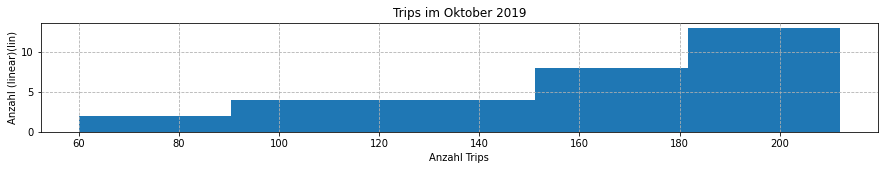

Info Histogram: [ Klassen: 5, Breite: 30.40000, Skew: -0.87613, Kurt: -0.07260 ]


In [15]:
_ = show_hist(df_oct2019_grouped['Trip count'], 'Anzahl Trips', 'Anzahl (linear)', 'Trips im Oktober 2019')

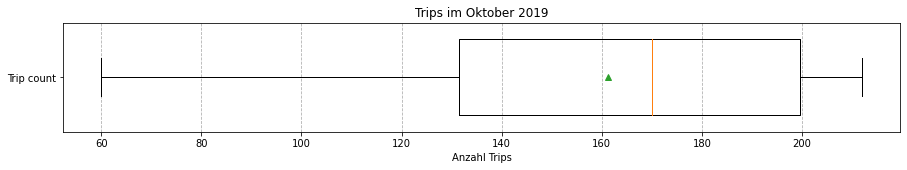

In [16]:
_ = show_box(df_oct2019_grouped['Trip count'], 'Anzahl Trips', 'Trips im Oktober 2019', labels=['Trip count'])

In [17]:
df_oct2019_grouped_subscriber = df_oct2019_idx[df_oct2019_idx['User Type'] == 'Subscriber'].groupby(by=['Date'])[['Trip Duration']].agg('count').rename({'Trip Duration': 'Trip count'}, axis=1)
df_oct2019_grouped_subscriber = df_oct2019_grouped_subscriber.resample('1D').ffill()
df_oct2019_grouped_customer = df_oct2019_idx[df_oct2019_idx['User Type'] == 'Customer'].groupby(by=['Date'])[['Trip Duration']].agg('count').rename({'Trip Duration': 'Trip count'}, axis=1)
df_oct2019_grouped_customer = df_oct2019_grouped_customer.resample('1D').ffill()

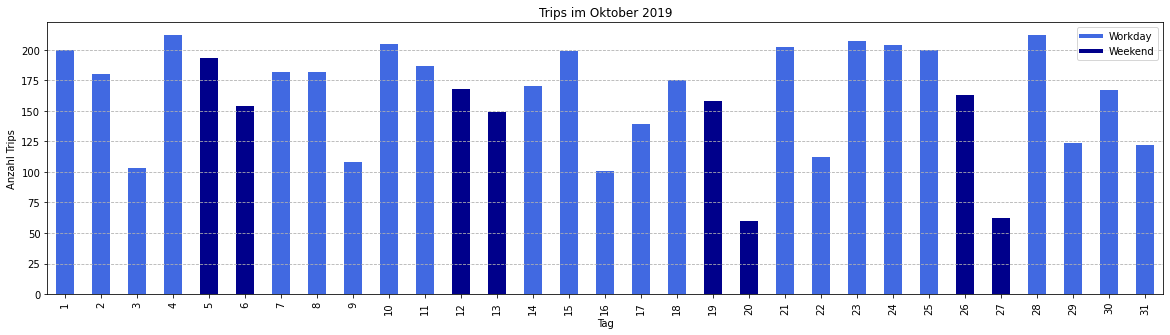

In [18]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot()
_ = df_oct2019_grouped.plot(ax=ax, y='Trip count', kind='bar', color=df_oct2019_grouped.index.map(lambda date: 'darkblue' if date.weekday() in [5, 6] else 'royalblue'))

ax.set_xlabel('Tag')
ax.set_ylabel('Anzahl Trips')
ax.set_title('Trips im Oktober 2019')

ax.yaxis.grid(linestyle='dashed')

ax.set_xticklabels(df_oct2019_grouped.index.day)

custom_lines = [Line2D([0], [0], color='royalblue', lw=4),
                Line2D([0], [0], color='darkblue', lw=4)]
ax.legend(custom_lines, ['Workday', 'Weekend'])

#plt.tight_layout()
plt.show()

Es gibt am 20. Oktober und am 27. Oktober einen Einbruch der Anzahl Trips, d.h. es sind an beiden Tagen knapp über 50 Trips gemacht worden. An den anderen Tagen sind immer über 100 Trips vorhanden. Die zwei Tage, mit den wenigsten Trips, sind Sonntage. Es fällt auf, dass immer bei einem Arbeitstag die Anzhal der Trips knapp über 100 ist, an anderen Tagen aber höher. Aktuell kann dies nicht erklärt werden, da es nicht immer der gleiche Wochentag ist. Hier sollte später noch eine Untersuchung in Zusammenhang mit dem Wetter gemacht werden, vielleicht hat es an den Tagen geregnet oder es war kalt.

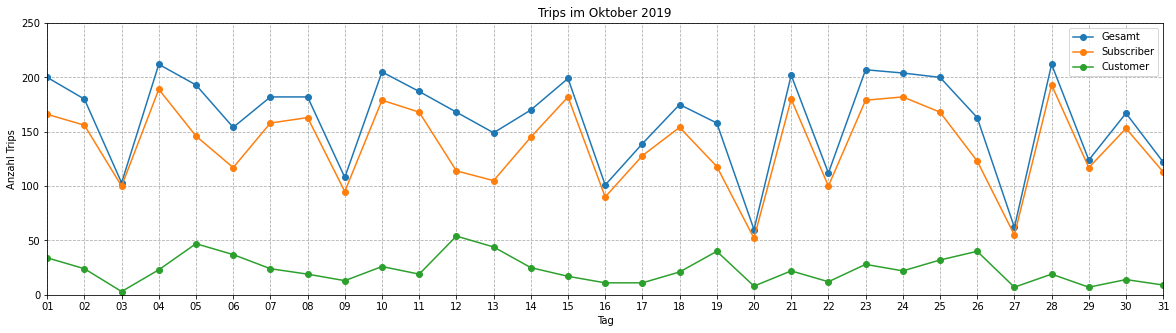

In [19]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot()
ax.plot_date(df_oct2019_grouped.index, df_oct2019_grouped['Trip count'], marker='o', ls='-', label='Gesamt')
ax.plot_date(df_oct2019_grouped_subscriber.index, df_oct2019_grouped_subscriber['Trip count'], marker='o', ls='-', label='Subscriber')
ax.plot_date(df_oct2019_grouped_customer.index, df_oct2019_grouped_customer['Trip count'], marker='o', ls='-', label='Customer')

ax.set_xlabel('Tag')
ax.set_ylabel('Anzahl Trips')
ax.set_title('Trips im Oktober 2019')

ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')


ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))

ax.set_ylim(0, 250)
ax.set_xlim([datetime(2019, 10, 1, 0, 0, 0, tzinfo=tz.gettz('US/Eastern')), datetime(2019, 10, 31, 0, 0, 0, tzinfo=tz.gettz('US/Eastern'))])

ax.legend()

#plt.tight_layout()
plt.show()

## User Type und Gender 

Ein paar Untersuchungen zu User Type und Gender.

In [20]:
df_oct2019[['User Type', 'Gender']].describe()

User Type Gender
count         5000   5000
unique           2      3
top     Subscriber      1
freq          4288   3359

Anzahl der Trips, gruppiert nach User Type.

In [21]:
trip_count_by_user_type = df_oct2019.groupby(by=['User Type'])['Trip Duration'].agg('count')
trip_count_by_user_type.name = 'Trip Counts'
trip_count_by_user_type

User Type
Customer       712
Subscriber    4288
Name: Trip Counts, dtype: int64

Anzahl der Trips, gruppiert nach User Type und Gender.

In [22]:
trip_count_by_user_type_and_gender = df_oct2019.groupby(by=['User Type', 'Gender'])['Trip Duration'].agg('count')
trip_count_by_user_type_and_gender.name = 'Trip Counts'
trip_count_by_user_type_and_gender

User Type   Gender
Customer    0          320
            1          265
            2          127
Subscriber  0           75
            1         3094
            2         1119
Name: Trip Counts, dtype: int64

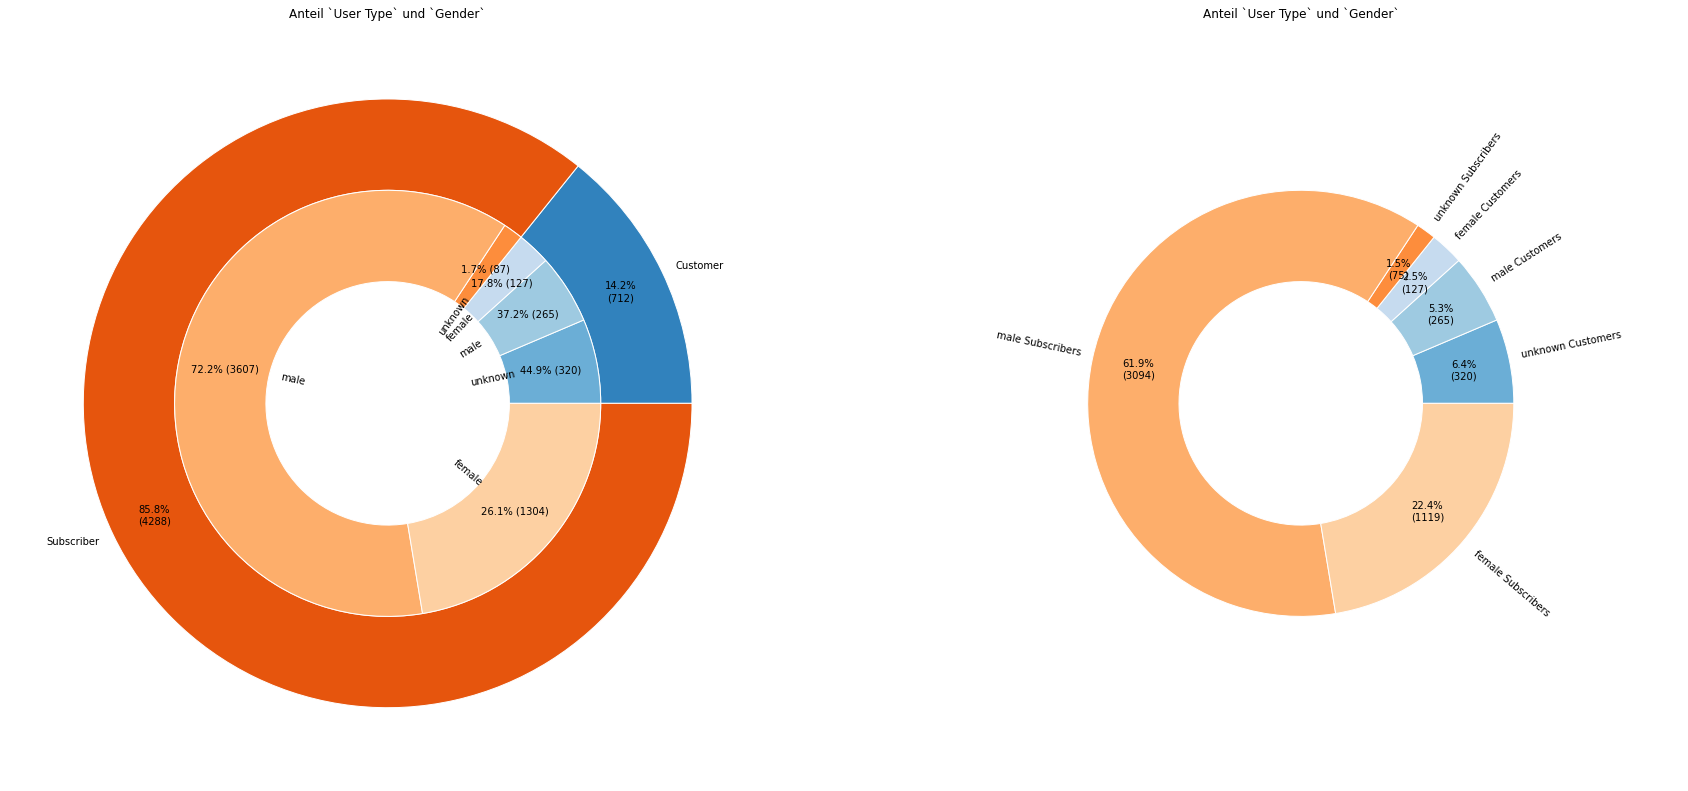

In [23]:
def func(pct, allvals):
    idx = np.argwhere(np.round(allvals / allvals.sum() * 100, 3).values == np.round(pct, 2))[0][0]
    absolute = int(allvals[idx])
    return "{:.1f}%\n({:d})".format(pct, absolute)

def func_inner(pct, allvals):
    idx = np.argwhere(np.round(allvals / allvals.sum() * 100, 3).values == np.round(pct, 2))[0][0]
    if idx <=2:
        pct_new = allvals[idx] / allvals[0:3].sum() * 100
        absolute = int(allvals[idx])
    else:
        pct_new = allvals[idx] / allvals[3:6].sum() * 100
        absolute = int(pct_new/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct_new, absolute)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7]))

outer_labels = ['Customer', 'Subscriber']
inner_labels = ['unknown', 'male', 'female', 'unknown', 'male', 'female']
inner_labels_abs = ['unknown Customers', 'male Customers', 'female Customers', 'unknown Subscribers', 'male Subscribers', 'female Subscribers']

ax[0].pie(trip_count_by_user_type, autopct=lambda pct: func(pct, trip_count_by_user_type), labels=outer_labels, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.85, labeldistance=1.05)

ax[0].pie(trip_count_by_user_type_and_gender, autopct=lambda pct: func_inner(pct, trip_count_by_user_type_and_gender), labels=inner_labels, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.78, labeldistance=0.39, rotatelabels=True)

ax[1].pie(trip_count_by_user_type_and_gender, autopct=lambda pct: func(pct, trip_count_by_user_type_and_gender), labels=inner_labels_abs, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.78, labeldistance=1.05, rotatelabels=True)

ax[0].set(aspect="equal", title='Anteil `User Type` und `Gender`')
ax[1].set(aspect="equal", title='Anteil `User Type` und `Gender`')

#plt.tight_layout()
plt.show()

In der linken Grafik ist folgendes ersichtlich:
* Die Trips werden mit 85.8% überwiegend von Subscribern gefahren. Die Customer sind mit 14.2% in der Unterzahl.
* Hauptsächlich fahren Männer mit den Bikes. Von den Subscribern sind dies 72.2% Männer gegenüber 26.1% Frauen. Bei den Customern 37.2% Männer gegenüber 17.8% Frauen.
* Das Geschlecht wird bei den Subscribern fast immer angegeben, nur 1.7% geben bei einem Trip kein Geschlecht an. Bei den Customern wird das Geschlecht grösstenteils nicht angegeben, der Anteil ist hier mit 44.9% am höchsten.

Die rechte Grafik stellt das innere Diagramm einfach nochmal dar, die Zahlen beziehen sich hier aber auf die gesamte Anzahl der Trips.

## Trip Duration

Untersuchungen zur Dauer der Trips.

In [24]:
df_oct2019[[col for col in df_oct2019.columns if col.startswith('Trip Duration')]].describe(percentiles=[0.05, .25, .5, .75, .95])

Trip Duration  Trip Duration (min)  Trip Duration (h)  \
count     5000.00000           5000.00000         5000.00000   
mean       922.72860             15.37881            0.25631   
std       5575.16818             92.91947            1.54866   
min         65.00000              1.08333            0.01806   
5%         182.95000              3.04917            0.05082   
25%        362.00000              6.03333            0.10056   
50%        606.00000             10.10000            0.16833   
75%       1021.25000             17.02083            0.28368   
95%       1984.05000             33.06750            0.55113   
max     377055.00000           6284.25000          104.73750   

       Trip Duration (d)  
count         5000.00000  
mean             0.01068  
std              0.06453  
min              0.00075  
5%               0.00212  
25%              0.00419  
50%              0.00701  
75%              0.01182  
95%              0.02296  
max              4.36406

Folgende Zahlen sind erwähnenswert:
* Der Median liegt bei 10.1 Minuten.
* Ein Trip dauerte durchschnittlich 15.4 Minuten.
* Der längste Trip dauerte 4.4 Tage und der kürzeste 1.1 Minuten.
* 5% der Trips dauerten mehr als 33.1 Minuten und 5% der Trips weniger als 3 Minuten.

Das der Durchschnitt 5.3 Minuten über dem Median liegt, ist wohl den ganz langen Trips, wie z.B. der Ausreisser von 4.4 Tagen, zuzuschreiben.

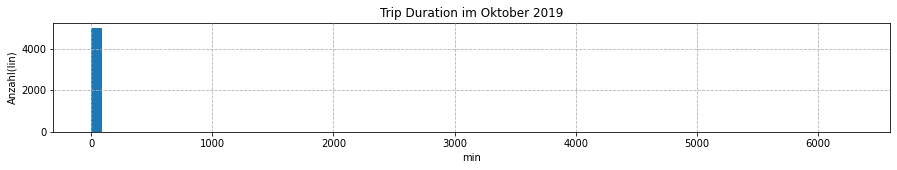

Info Histogram: [ Klassen: 70, Breite: 89.75952, Skew: 62.24698, Kurt: 4156.34407 ]


In [25]:
_ = show_hist(df_oct2019['Trip Duration (min)'], 'min', 'Anzahl', 'Trip Duration im Oktober 2019')

Es scheint nur eine Klasse nahe bei null zu geben. Die Zahlen oben haben schon gezeigt das 95% der Werte unter 33.1 Minuten liegen. Damit die Werte rechts auch ersichtlich werden, wird das Histogramm noch mit logarithmischer y-Achse erstellt.

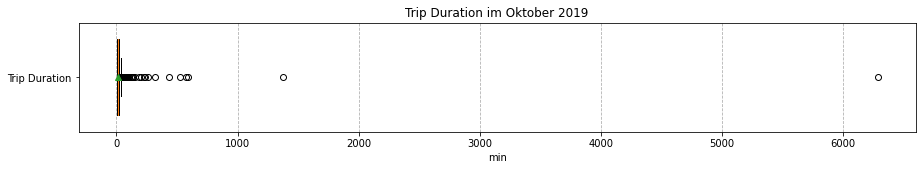

In [26]:
_ = show_box(df_oct2019['Trip Duration (min)'], 'min', 'Trip Duration im Oktober 2019', labels=['Trip Duration'])

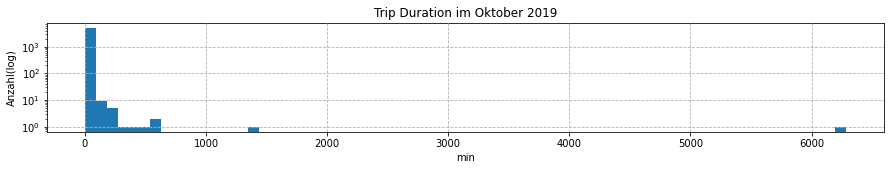

Info Histogram: [ Klassen: 70, Breite: 89.75952, Skew: 62.24698, Kurt: 4156.34407 ]


In [27]:
_ = show_hist(df_oct2019['Trip Duration (min)'], 'min', 'Anzahl', 'Trip Duration im Oktober 2019', log=True)

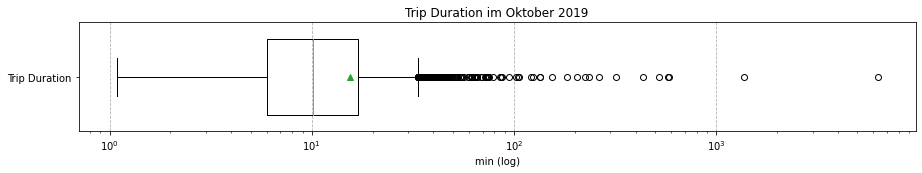

In [28]:
_ = show_box(df_oct2019['Trip Duration (min)'], 'min (log)', 'Trip Duration im Oktober 2019', log=True, labels=['Trip Duration'])

Ab ca. 600 Minuten gibt quasi keine Klassen mehr. Da nur 5% der Werte (d.h. genau $5000 * 0.05 = 250$ Werte) über 33.1 Minuten liegen, wird für die Übersichtlichkeit noch ein Plot mit den Trips, die kürzer als 33.1 Minuten sind, erstellt.

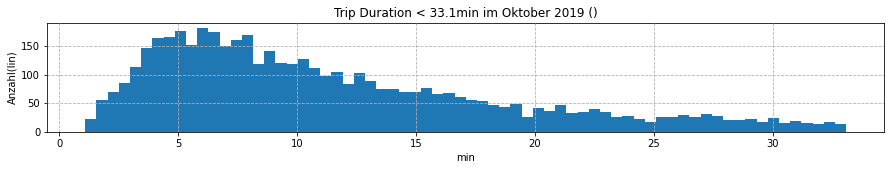

Info Histogram: [ Klassen: 68, Breite: 0.47059, Skew: 0.96055, Kurt: 0.16901 ]


In [29]:
_ = show_hist(df_oct2019[df_oct2019['Trip Duration (min)'] < 33.1]['Trip Duration (min)'], 'min', 'Anzahl', 'Trip Duration < 33.1min im Oktober 2019 ()')

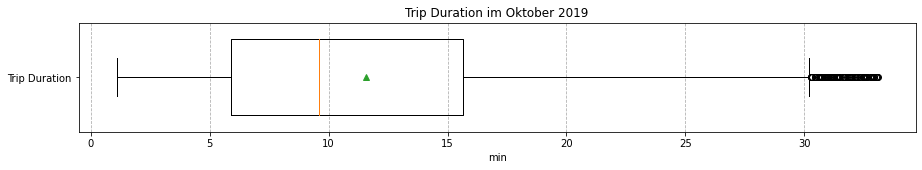

In [30]:
_ = show_box(df_oct2019[df_oct2019['Trip Duration (min)'] < 33.1]['Trip Duration (min)'], 'min', 'Trip Duration im Oktober 2019', labels=['Trip Duration'])

Und dazu auch noch die Tabelle mit einer Beschreibung der Werte.

In [31]:
df_oct2019[df_oct2019['Trip Duration (min)'] < 33.1][[col for col in df_oct2019.columns if col.startswith('Trip Duration')]].describe(percentiles=[0.05, .25, .5, .75, .95])

Trip Duration  Trip Duration (min)  Trip Duration (h)  \
count     4751.00000           4751.00000         4751.00000   
mean       693.62345             11.56039            0.19267   
std        441.27930              7.35465            0.12258   
min         65.00000              1.08333            0.01806   
5%         179.00000              2.98333            0.04972   
25%        354.00000              5.90000            0.09833   
50%        575.00000              9.58333            0.15972   
75%        939.00000             15.65000            0.26083   
95%       1635.50000             27.25833            0.45431   
max       1985.00000             33.08333            0.55139   

       Trip Duration (d)  
count         4751.00000  
mean             0.00803  
std              0.00511  
min              0.00075  
5%               0.00207  
25%              0.00410  
50%              0.00666  
75%              0.01087  
95%              0.01893  
max              0.02297

Die Bikes werden eher nur sehr kurze Zeit genutzt. Dies hängt vermutlich mit dem Preismodell zusammen, bei welchem 30 minuten pro Trip für Customers gratis sind. Bei einem Subscriber sind 45 Minuten gratis. Die einzelnen Gruppen werden noch in einem Boxplot miteinander verglichen.

In [32]:
def  get_data_for_boxplot_duration(max_duration_hours = np.Inf):
    
    df = df_oct2019[df_oct2019['Trip Duration (h)'] <= max_duration_hours]
    
    data = [
        df[df['User Type'] == 'Customer']['Trip Duration (min)'],
        df[df['User Type'] == 'Subscriber']['Trip Duration (min)'],
        df[df['Gender'] == '0']['Trip Duration (min)'],
        df[df['Gender'] == '1']['Trip Duration (min)'],
        df[df['Gender'] == '2']['Trip Duration (min)'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '0')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '1')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '2')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '0')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '1')]['Trip Duration (min)'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '2')]['Trip Duration (min)'],
    ]
    labels = [
        'Customers',
        'Subscribers',
        'Gender Unknown',
        'Male',
        'Women',
        'Customers & Gender Unknown',
        'Customers & Male',
        'Customers & Woman',
        'Subscribers & Gender Unknown',
        'Subscribers & Male',
        'Subscribers & Woman',
    ]
    
    return {'data': data, 'labels': labels}

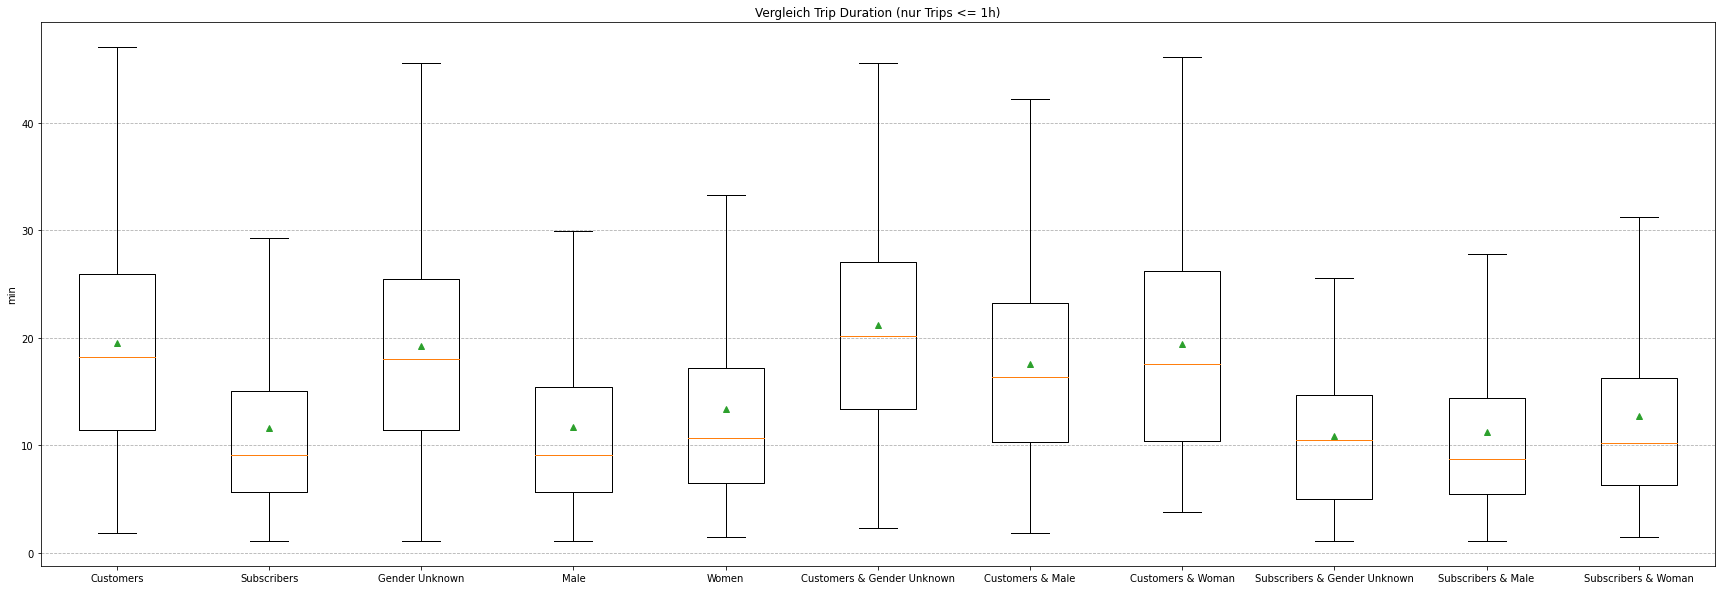

In [33]:
fig, ax = plt.subplots(figsize=(30, 10))

dict_data = get_data_for_boxplot_duration(1)
_ = ax.boxplot(dict_data['data'], vert=True, showmeans=True, labels=dict_data['labels'], showfliers=False)
ax.set_ylabel('min')
ax.set_title('Vergleich Trip Duration (nur Trips <= 1h)')

ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dashed')

#plt.tight_layout()
plt.show()

Folgendes fällt hier auf:
* Trips von Customern dauern länger als solche von Subscribern.
* Die Frauen nutzen die Bikes länger als die Männer. Benutzer die kein Geschlecht angeben, fahren länger als solche die ihr Geschlecht angeben.
* Bei den Subscribern ist mit Berücksichtigung des Geschlechts kein grosser Unterschied zu sehen und die durchschnittliche Dauer der Fahrten liegt nahe beieinander.

Obwohl ein Subscriber 45 Minuten pro Trip gratis fahren könnte, verwendet dieser die Bikes weniger lange als ein Customer mit nur 30 Minuten inklusive. Es wird vermutet, dass Subscriber mehrheitlich Touristen sind, welche Sightseeing betreiben und Subscriber in New York leben und das Bike nutzen, um z.B. zur Arbeit zu fahren.

## Age 2020

Ein paar Untersuchungen zu Age 2020.

In [34]:
df_oct2019[['Age 2020']].describe(percentiles=[0.05, .25, .5, .75, .95])

Age 2020
count 5000.00000
mean    39.61800
std     12.01451
min     17.00000
5%      24.00000
25%     30.00000
50%     37.00000
75%     51.00000
95%     60.00000
max    134.00000

Erkenntnisse aus der Übersicht:
* Der älteste Benutzer scheint hier 134 Jahre alt zu sein. Hier handelt es sich wohl um eine nicht korrekte Angabe des Alters.
* Der Jüngste Benuzter ist 17 Jahre alt.
* Im Durschnitt fahren 39 jährige Benutzer die Trips.
* Die über 60 jährigen fahren 5% der Trips.

In [35]:
print('Anzahl unterschiedlicher Werte in "Age 2020": {}'.format(len(df_oct2019['Age 2020'].unique())))

Anzahl unterschiedlicher Werte in "Age 2020": 67


Zwar ist Age 2020 diskret, aber da es doch 67 unterschiedliche Werte hat, wird das Merkmal einfach mal als quasi-stetig behandelt und in einem Histogramm visualisiert.

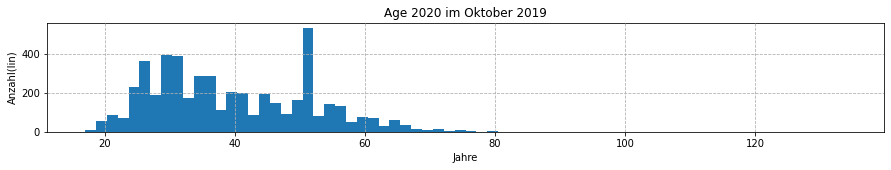

Info Histogram: [ Klassen: 70, Breite: 1.67143, Skew: 0.61146, Kurt: 0.47641 ]


In [36]:
_ = show_hist(df_oct2019['Age 2020'], 'Jahre', 'Anzahl', 'Age 2020 im Oktober 2019')

In der Nähe der Klasse mit 30 Jahren und der Klasse mit 50 Jahren gibt es zwei Anhäufungen. Die meisten Nutzer sind also etwa 30 oder 50 Jahre alt. Rechts scheint es noch ein paar Ausreisser zu geben, diese wären dann über 80 Jahre alt.
Um diese auch noch zu sehen, hier das Histogramm nochmals mit logarithmischer y-Achse.

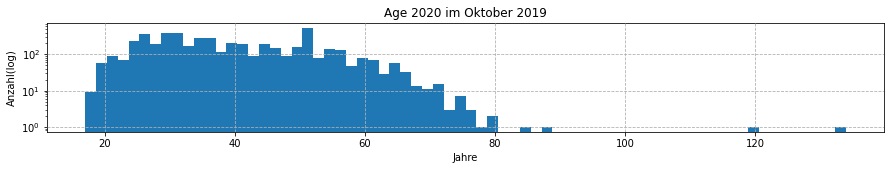

Info Histogram: [ Klassen: 70, Breite: 1.67143, Skew: 0.61146, Kurt: 0.47641 ]


In [37]:
_ = show_hist(df_oct2019['Age 2020'], 'Jahre', 'Anzahl', 'Age 2020 im Oktober 2019', log=True)

Das Histogramm zeigt, dass die meisten unter 80 Jahre alt sind, darüber gibt es nur wenige Klassen. Die beiden Klassen ab 120 Jahre sind sehr unrealistisch und hier wurden vermutlich falsche Angaben gemacht.

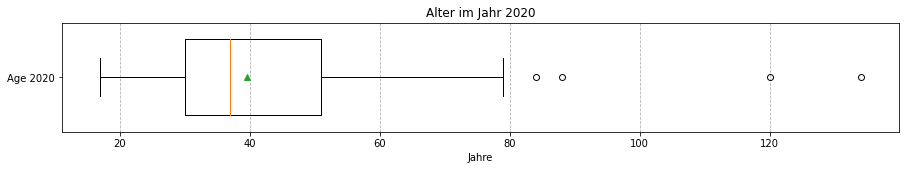

In [38]:
_ = show_box(df_oct2019['Age 2020'], 'Jahre', 'Alter im Jahr 2020', labels=['Age 2020'])

Im Boxplot ist ersichtlich,
* dass der Durchschnitt etwas unter 40 Jahre liegt (wie oben schon gezeigt liegt dieser bei genau 39.6 Jahren).
* der Median bei 37 Jahren.
* es gegen oben ein paar Ausreisser gibt, die über 80 Jahre alt sind.

In [39]:
def  get_data_for_boxplot_age2020(max_age = np.Inf):
    
    df = df_oct2019[df_oct2019['Age 2020'] <= max_age]
    
    data = [
        df[df['User Type'] == 'Customer']['Age 2020'],
        df[df['User Type'] == 'Subscriber']['Age 2020'],
        df[df['Gender'] == '0']['Age 2020'],
        df[df['Gender'] == '1']['Age 2020'],
        df[df['Gender'] == '2']['Age 2020'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '0')]['Age 2020'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '1')]['Age 2020'],
        df[(df['User Type'] == 'Customer') & (df['Gender'] == '2')]['Age 2020'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '0')]['Age 2020'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '1')]['Age 2020'],
        df[(df['User Type'] == 'Subscriber') & (df['Gender'] == '2')]['Age 2020'],
    ]
    labels = [
        'Customers',
        'Subscribers',
        'Gender Unknown',
        'Male',
        'Women',
        'Customers & Gender Unknown',
        'Customers & Male',
        'Customers & Woman',
        'Subscribers & Gender Unknown',
        'Subscribers & Male',
        'Subscribers & Woman',
    ]
    
    return {'data': data, 'labels': labels}

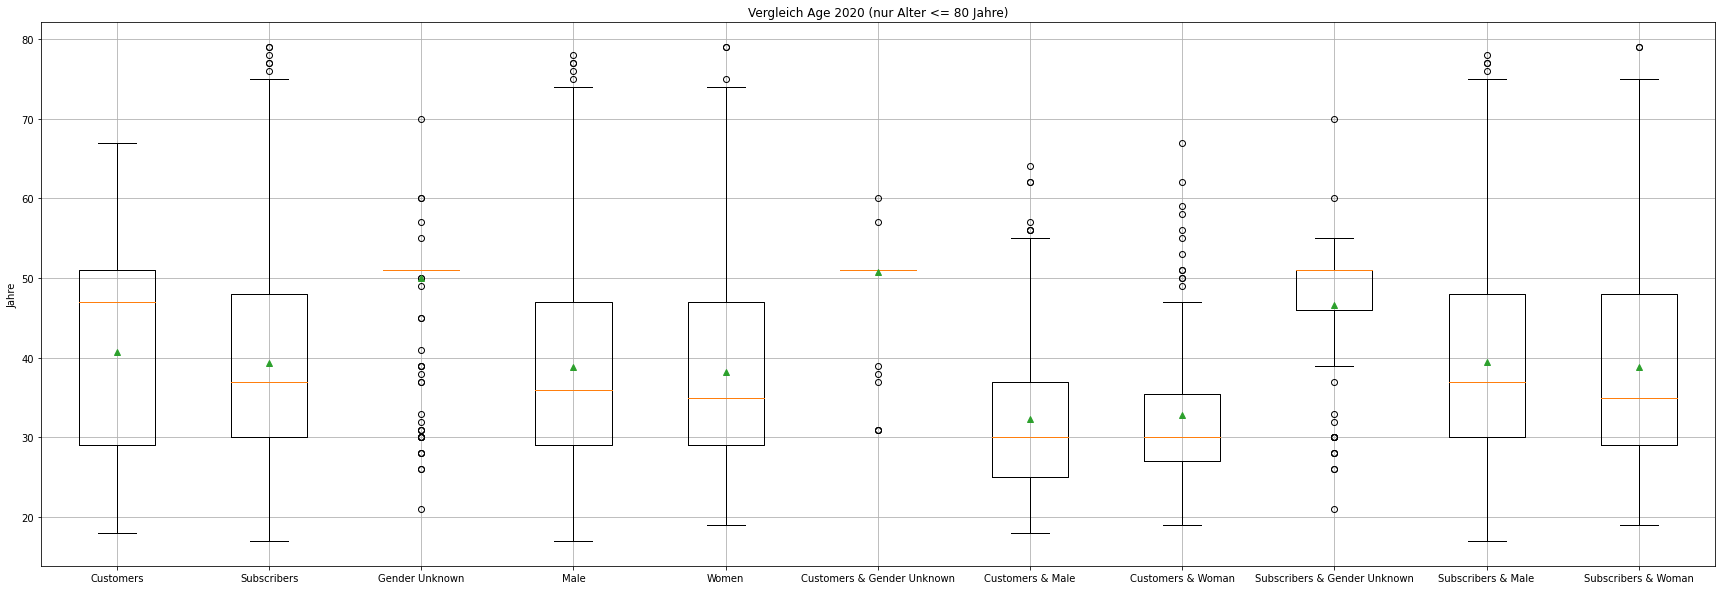

In [40]:
fig, ax = plt.subplots(figsize=(30, 10))

dict_data = get_data_for_boxplot_age2020(80)
_ = ax.boxplot(dict_data['data'], vert=True, showmeans=True, labels=dict_data['labels'], showfliers=True)
ax.set_ylabel('Jahre')
ax.set_title('Vergleich Age 2020 (nur Alter <= 80 Jahre)')
plt.grid(b=True)

#plt.tight_layout()
plt.show()

Im Vergleich ist ersichtlich:
* Die Customer sind im Durchschnitt ca. 2 Jahre jünger als die Subscriber. Der Median ist aber bei den Subscribern viel tiefer als bei den Customern.
* Wenn das Geschlecht nicht angegeben wird, dann ist man im Durchschnitt 50 Jahre alt. Der Median liegt hier ein Jahr höher bei 51 Jahren. (Vielleicht ist hier bei der Anmeldung ein Wert voreingestellt welcher dann einfach übernommen wird?!)
* Bei den Customern sind Männer und Frauen im Durchschnitt ca. gleich alt. Bei den Subscribern sind die Frauen im Durchschnitt etwas jünger.

### Anzahl Trips nach Alter

Untersuchung der Anzahl Trips nach Alter.

In [41]:
trip_count_customers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Customer'].groupby(by=['Age 2020', 'Gender'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration':'Trip count'}, axis=1)
trip_count_customers_groupby_age = trip_count_customers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Trip count')
trip_count_customers_groupby_age.columns = ['unknown', 'male', 'female']
#trip_count_customers_groupby_age.head()

In [42]:
trip_count_subscribers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Subscriber'].groupby(by=['Age 2020', 'Gender'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration':'Trip count'}, axis=1)
trip_count_subscribers_groupby_age = trip_count_subscribers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Trip count')
trip_count_subscribers_groupby_age.columns = ['unknown', 'male', 'female']
#trip_count_subscribers_groupby_age.head()

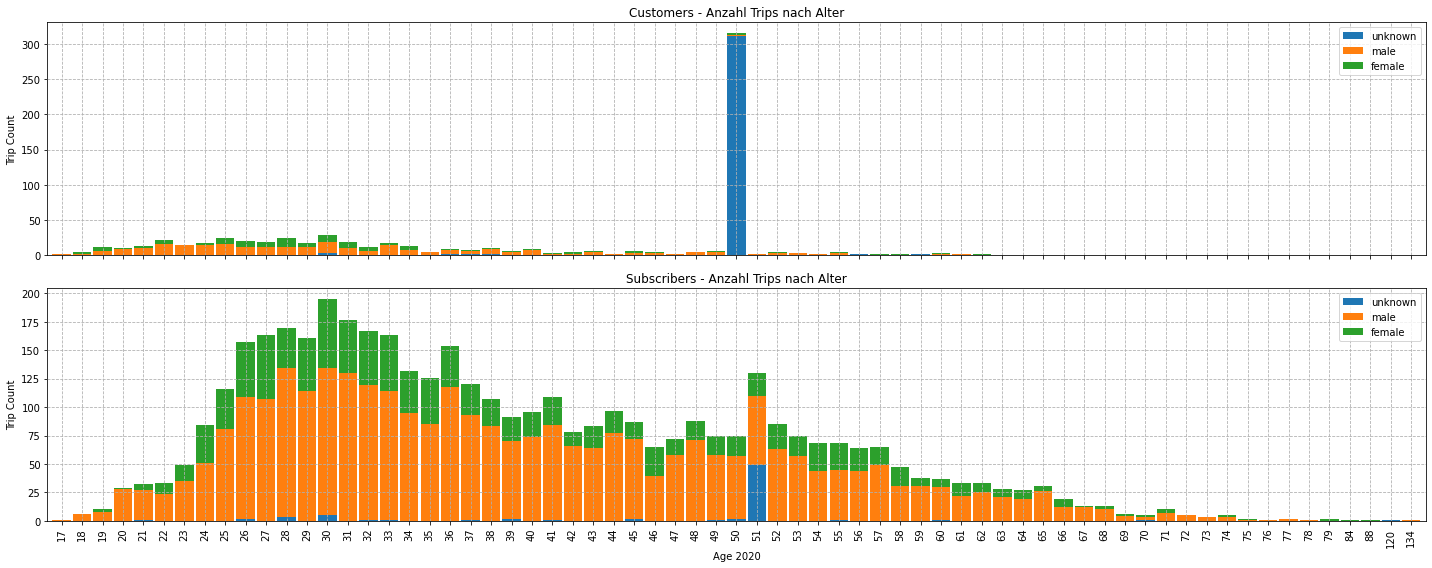

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=False)

trip_count_customers_groupby_age.plot(ax=ax[0], kind='bar', stacked=True, width=0.9)
ax[0].set_axisbelow(False)
ax[0].yaxis.grid(linestyle='dashed')
ax[0].xaxis.grid(linestyle='dashed')
ax[0].set_ylabel('Trip Count')
ax[0].set_title('Customers - Anzahl Trips nach Alter')

trip_count_subscribers_groupby_age.plot(ax=ax[1], kind='bar', stacked=True, width=0.9)
ax[1].set_axisbelow(False)
ax[1].yaxis.grid(linestyle='dashed')
ax[1].xaxis.grid(linestyle='dashed')
ax[1].set_ylabel('Trip Count')
ax[1].set_title('Subscribers - Anzahl Trips nach Alter')

plt.tight_layout()
plt.show()

In den beiden obenstehenden Grafiken ist folgendes ersichtlich:
* Die meisten Customer, die ihr Geschlecht bei einem Trip nicht angeben, sind 50 Jahre alt. Bei den Subscribern geben hauptsächlich die 51 jährigen ihr Geschlecht nicht an.
* Am meisten Trips wurden durch 30 jährige gefahren. Wobei hier der Anteil der Fahrten von Männern höher ist, als der der Frauen.

## Station

Ein paar Untersuchungen zu den Stationen.

In [44]:
df_oct2019[[col for col in df_oct2019.columns if col.endswith('Station Latitude') or col.endswith('Station Longitude') or col.endswith('Station Name') or col == 'Linear Distance']].describe(include='all')

Start Station Name  Start Station Latitude  \
count                    5000              5000.00000   
unique                    715                     nan   
top     Pershing Square North                     nan   
freq                       34                     nan   
mean                      NaN                40.73813   
std                       NaN                 0.02969   
min                       NaN                40.65709   
25%                       NaN                40.71910   
50%                       NaN                40.73902   
75%                       NaN                40.75763   
max                       NaN                40.81830   

        Start Station Longitude       End Station Name  End Station Latitude  \
count                5000.00000                   5000            5000.00000   
unique                      nan                    714                   nan   
top                         nan  Pershing Square North                   nan   
freq                        nan                     50                   nan   
mean                  -73.98222                    NaN              40.73742   
std                     0.01951                    NaN               0.02940   
min                   -74.02535                    NaN              40.65540   
25%                   -73.99530                    NaN              40.71850   
50%                   -73.98518                    NaN              40.73827   
75%                   -73.97189                    NaN              40.75643   
max                   -73.90774                    NaN              40.81830   

        End Station Longitude  Linear Distance  
count              5000.00000       5000.00000  
unique                    nan              nan  
top                       nan              nan  
freq                      nan              nan  
mean                -73.98255          1.75303  
std                   0.01981          1.36817  
min                 -74.02535          0.00000  
25%                 -73.99596          0.83659  
50%                 -73.98658          1.34903  
75%                 -73.97209          2.24275  
max                 -73.90904         11.32096

Erkenntnisse aus der Übersicht:
* Start und End Station ID haben das Skalenniveau 'nominal', daher machen die Werte für diese beiden Spalten keinen Sinn und wurden daher weggelassen.
* Start und End Station Name sind zwar auch 'nominal', aber die Übersicht gibt hier doch ein paar Werte aus die sinnvoll sind.
* Es gibt 715 verschiedene Stationen von welchen aus Trips gestartet wurden und 714 verschiedene Stationen an welchen Trips endeten.
* Top Start und End Station ist 'Persing Square North'. Es wurden 34 Trips ab dieser Station gestartet und 50 Trips endeten an der Station.
* Örtlich liegen die Stationen nahe beeinander, denn die Standardabweichung ist sehr klein. Auch der minimale und maximale Wert bei Latitude und Longitude liegen nahe beieinander. Bei Latitude nicht mehr als 18km und bei Longitude nicht mehr als 13km.
* Die Stationen liegen nie weiter als 11km Luftlinie auseinander. Dies sieht man am Maximalwert in der Spalte 'Linear Distance'.
* Bei 'Linear Distance' ist der minimale Wert 0km, dies weil Trips an der gleichen Station enden können an welcher sie gestartet wurden.
* Durchschnittlich enden die Trips an einer 1.8km entfernten Station.

### Distanz der Trips nach Alter

Untersuchung der Distanz der Trips nach Alter.

In [45]:
trip_distance_customers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Customer'].groupby(by=['Age 2020', 'Gender'])['Linear Distance'].agg('sum').reset_index().rename({'Linear Distance':'Linear Distance sum'}, axis=1)
trip_distance_customers_groupby_age = trip_distance_customers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Linear Distance sum')
trip_distance_customers_groupby_age.columns = ['unknown', 'male', 'female']
trip_distance_customers_groupby_age.head()

unknown     male  female
Age 2020                          
18            nan  7.78611     nan
19            nan  2.68068 5.77759
20            nan  5.29685 7.05236
21            nan 14.23288 3.58641
22            nan 13.07416 6.29207

In [46]:
trip_distance_subscribers_groupby_age = df_oct2019[df_oct2019['User Type'] == 'Subscriber'].groupby(by=['Age 2020', 'Gender'])['Linear Distance'].agg('sum').reset_index().rename({'Linear Distance':'Linear Distance sum'}, axis=1)
trip_distance_subscribers_groupby_age = trip_distance_subscribers_groupby_age.pivot(index='Age 2020', columns='Gender', values='Linear Distance sum')
trip_distance_subscribers_groupby_age.columns = ['unknown', 'male', 'female']
trip_distance_subscribers_groupby_age.head()

unknown     male  female
Age 2020                          
17            nan  5.54349     nan
18            nan 10.42336     nan
19            nan  5.71189 1.76693
20            nan 33.78851 0.00000
21        0.90272 47.93252 7.87548

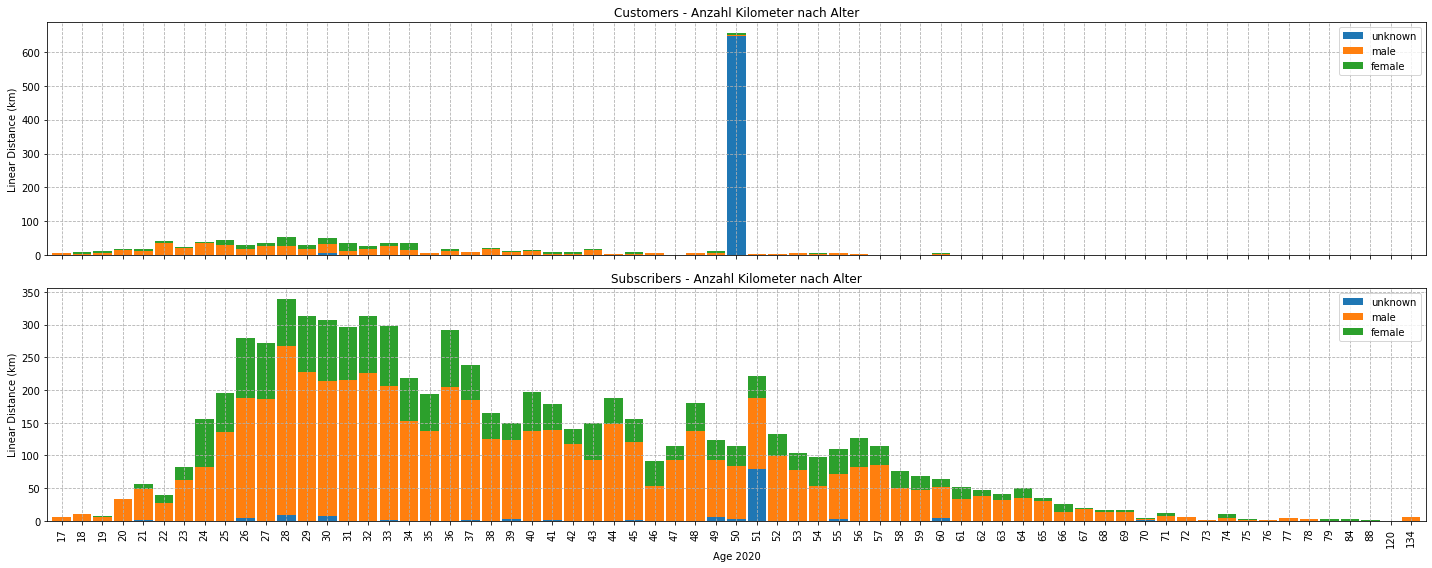

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 8), sharex=True, sharey=False)

trip_distance_customers_groupby_age.plot(ax=ax[0], kind='bar', stacked=True, width=0.9)
ax[0].set_axisbelow(False)
ax[0].yaxis.grid(linestyle='dashed')
ax[0].xaxis.grid(linestyle='dashed')
ax[0].set_ylabel('Linear Distance (km)')
ax[0].set_title('Customers - Anzahl Kilometer nach Alter')

trip_distance_subscribers_groupby_age.plot(ax=ax[1], kind='bar', stacked=True, width=0.9)
ax[1].set_axisbelow(False)
ax[1].yaxis.grid(linestyle='dashed')
ax[1].xaxis.grid(linestyle='dashed')
ax[1].set_ylabel('Linear Distance (km)')
ax[1].set_title('Subscribers - Anzahl Kilometer nach Alter')

plt.tight_layout()
plt.show()

In den beiden obenstehenden Grafiken ist folgendes ersichtlich:
* Die 50 jährigen Customer, die am meisten Trips gefahren sind, legen natürlich auch die grösste Distanz zurück.
* Die 28 jährigen legen bei den Subscribern am meiten Kilometer zurück.

### Top Stationen

In [48]:
starts_count = df_oct2019.groupby(by=['Start Station Name'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration' :'Starts count', 'Start Station Name': 'Station Name'}, axis=1).set_index('Station Name')
#starts_count.head()

In [49]:
ends_count = df_oct2019.groupby(by=['End Station Name'])['Trip Duration'].agg('count').reset_index().rename({'Trip Duration' :'Ends count', 'End Station Name': 'Station Name'}, axis=1).set_index('Station Name')
#ends_count.head()

In [50]:
start_stations = df_oct2019[[col for col in df_oct2019.columns if col.startswith('Start Station')]].rename({'Start Station ID': 'Station ID', 'Start Station Name': 'Station Name', 'Start Station Latitude': 'Latitude', 'Start Station Longitude': 'Longitude'}, axis=1).set_index('Station Name')
start_stations = start_stations[start_stations.duplicated() == False]
#start_stations

In [51]:
end_stations = df_oct2019[[col for col in df_oct2019.columns if col.startswith('End Station')]].rename({'End Station ID': 'Station ID', 'End Station Name': 'Station Name', 'End Station Latitude': 'Latitude', 'End Station Longitude': 'Longitude'}, axis=1).set_index('Station Name')
end_stations = end_stations[end_stations.duplicated() == False]
#end_stations

In [52]:
stations = pd.concat([start_stations, end_stations])
stations = stations[stations.duplicated() == False]
#stations

In [53]:
trip_counts_by_station = pd.concat([starts_count, ends_count, stations], axis=1)
trip_counts_by_station.insert(2, 'Trip count', trip_counts_by_station[['Starts count', 'Ends count']].sum(axis=1))
trip_counts_by_station = trip_counts_by_station.sort_values(by='Trip count', ascending=False)
trip_counts_by_station.index.name = 'Station Name'
#trip_counts_by_station.head()

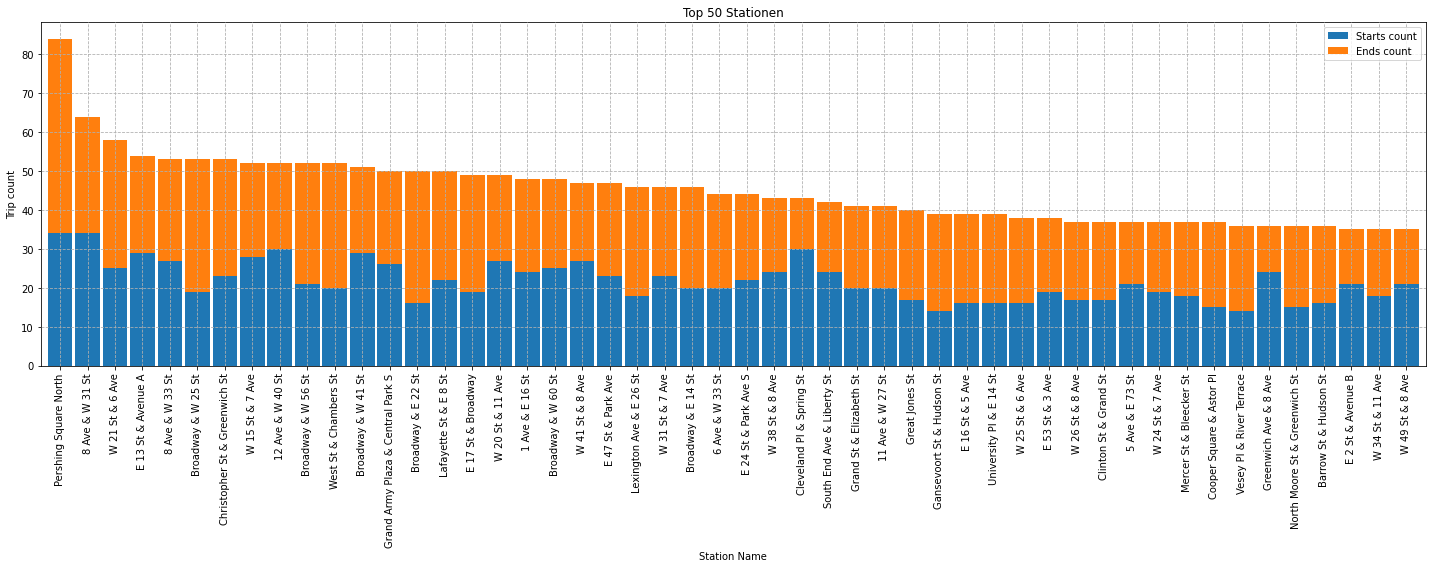

In [54]:
fig, ax = plt.subplots(figsize=(20, 8))

trip_counts_by_station[0:50][['Starts count', 'Ends count']].plot(ax=ax, kind='bar', stacked=True, width=0.9)
ax.set_axisbelow(False)
ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')
ax.set_ylabel('Trip count')
ax.set_title('Top 50 Stationen')

plt.tight_layout()
plt.show()

Die 50 Stationen mit den meisten Trips wurden in einem Barplot dargestellt.
* Die Station 'Pershing Square North' ist mit über 80 Trips an erster Stelle.
* Die Station 'W49 St & 8 Ave' bildet mit ca. 35 Trips das Schlusslicht der Top 50.

Die Top 50 Stationen werden noch auf einer Map dargestellt. Dabei stellt die Grösse und die Farbe des Kreises die Anzahl Trips dar. Gelb ist die Station 'Pershing Square North' mit den meisten Trips. Diese liegt am Grand Central Terminal, was vermutlich auch der Grund für die stärkere Auslastung ist.

#### Tip 50 Stationen auf einer Karte

In [55]:
import tilemapbase
tilemapbase.init(create=True)
tiles_osm = tilemapbase.tiles.Carto_Light

#center_nyc = (-73.967419961490, 40.73100351879932)
center_nyc = (-73.984803, 40.745687)

degree_range_heigth = 0.07
degree_range_width = 0.06
extent = tilemapbase.Extent.from_lonlat(
    center_nyc[0] - degree_range_heigth, center_nyc[0] + degree_range_heigth, 
    center_nyc[1] - degree_range_width, center_nyc[1] + degree_range_width)
extent = extent.to_aspect(1.0)

In [56]:
projection = trip_counts_by_station[0:50].apply(lambda row: tilemapbase.project(latitude=row['Latitude'], longitude=row['Longitude']), axis=1)

x_coords = []
y_coords =[]
names = []
counts = []

for idx, val in enumerate(projection.values):
    x_coords.append(val[0])
    y_coords.append(val[1])
    names.append(trip_counts_by_station[0:50].reset_index()['Station Name'][idx])
    counts.append(trip_counts_by_station[0:50]['Trip count'][idx])

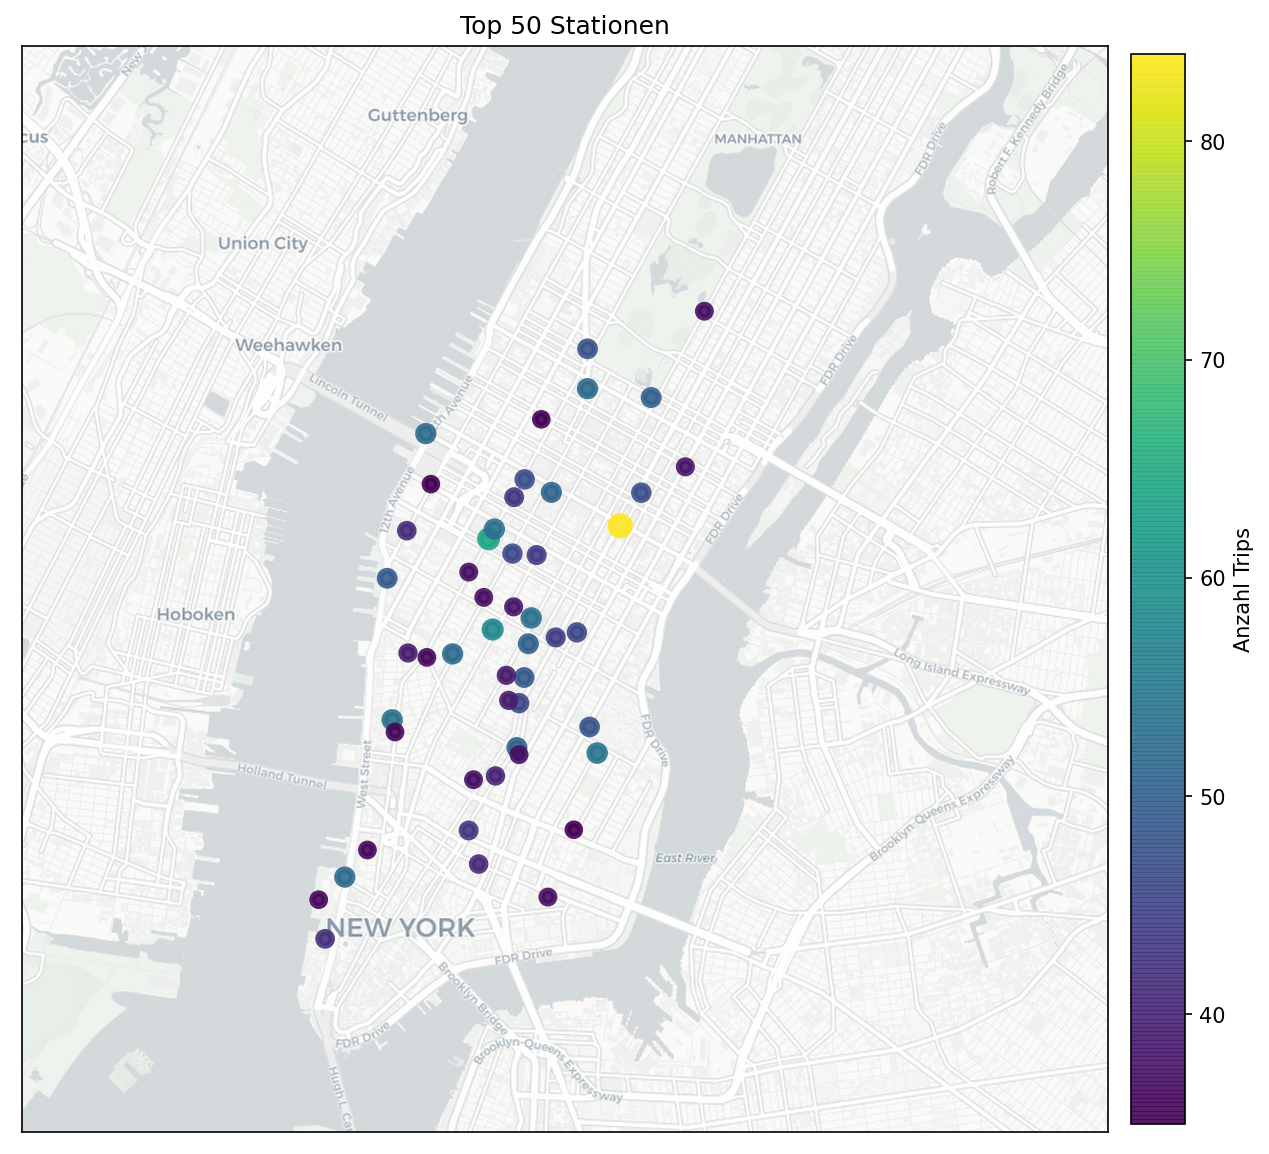

In [57]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, tiles_osm, width=600)
plotter.plot(ax, tiles_osm)

sc = ax.scatter(x_coords, y_coords, c=counts, s=counts, cmap=plt.cm.get_cmap('viridis'), alpha=0.9, linewidths=3)

cbar = plt.colorbar(sc, fraction=0.046, pad=0.02, label='Anzahl Trips', orientation='vertical')

ax.set_title('Top 50 Stationen')

#plt.tight_layout()
plt.show()

Auf der Karte ist die Station 'Pershing Square North' mit einem gelben Punkt markiert, diese Station hat auch die meisten Trips.

## temp

Untersuchungen zur Temperatur.

In [58]:
df_oct2019['temp'].describe()

count   5000.00000
mean      16.61370
std        3.98866
min        6.09000
25%       14.06000
50%       16.02000
75%       18.41000
max       33.07000
Name: temp, dtype: float64

* Die Temperatur im Oktober 2019 war im Durchschnitt 16.6°C.
* Tiefste Temperatur war 6°C.
* Höchste Temperatur war 33.1°C.

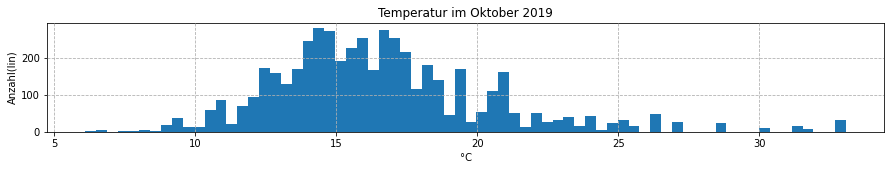

Info Histogram: [ Klassen: 70, Breite: 0.38543, Skew: 1.14378, Kurt: 2.33898 ]


In [59]:
_ = show_hist(df_oct2019['temp'], '°C', 'Anzahl', 'Temperatur im Oktober 2019')

Wie oben bei der Übersicht mit den Zahlen ersichtlich, häufen sich im Histogramm die Werte zwischen 14 und 18°C.

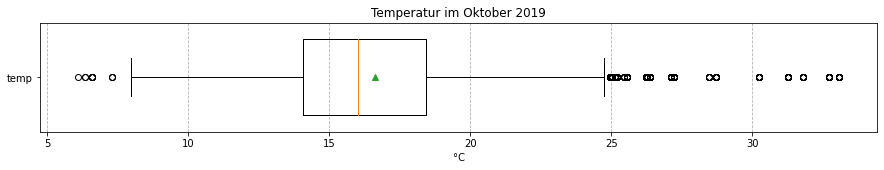

In [60]:
_ = show_box(df_oct2019['temp'], '°C', 'Temperatur im Oktober 2019', labels=['temp'])

Damit eine Aussage darüber gemacht werden kann, wie die Temperatur an welchen Tagen war, wird ein Plot über den Monat Oktober 2019 dargestellt.

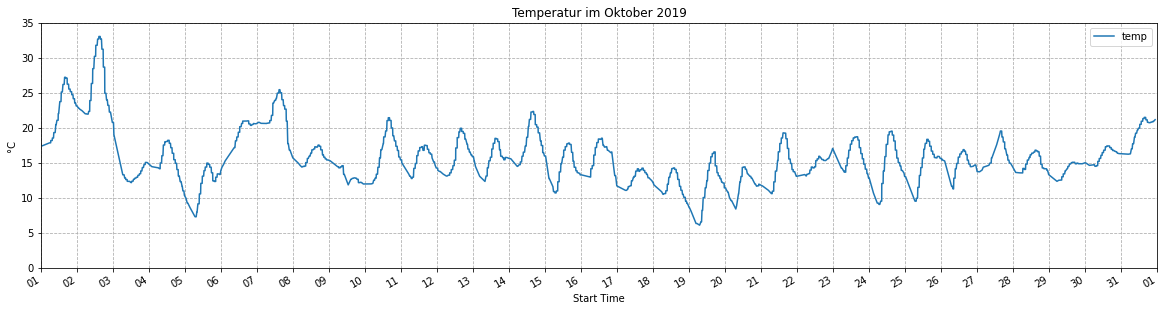

In [61]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot()
_ = df_oct2019.sort_values('Start Time')[['Start Time', 'temp']].set_index('Start Time').plot(ax=ax, y='temp')

ax.set_xlabel('Start Time')
ax.set_ylabel('°C')
ax.set_title('Temperatur im Oktober 2019')

ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))

ax.set_ylim(0, 35)
ax.set_xlim([datetime(2019, 10, 1, 0, 0, 0, tzinfo=tz.gettz('US/Eastern')), datetime(2019, 11, 1, 0, 0, 0, tzinfo=tz.gettz('US/Eastern'))])

#plt.tight_layout()
plt.show()

* Der Tag mit der höchsten Temperatur ist anfangs Oktober, ca. am 2.10.2019.
* Am Tiefsten war die Temperatur am 19.10.2019.

Diese beiden Tage werden in den nächsten beiden Kapiteln noch in einem eigenen Tagesverlauf dargestellt.

### Temperaturverlauf am Tag mit höchstem Temperaturwert

In [62]:
df_oct2019[['Start Time', 'temp']].sort_values('temp', ascending=False).head(1)

Start Time     temp
129275 2019-10-02 14:38:04-04:00 33.07000

Der Tag mit der höchsten Temperatur ist der **2.10.2019**.

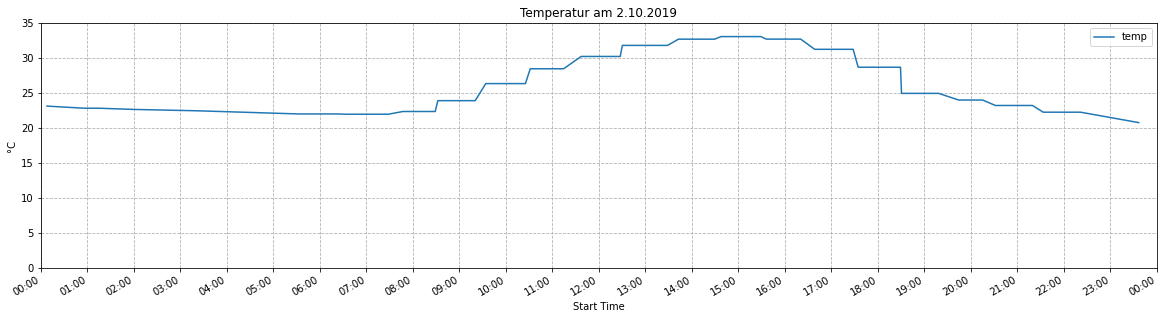

In [63]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot()
_ = df_oct2019[['Start Time', 'temp']].set_index('Start Time')['2019-10-02'].plot(ax=ax, y='temp')

ax.set_xlabel('Start Time')
ax.set_ylabel('°C')
ax.set_title('Temperatur am 2.10.2019')

ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')
             
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax.set_ylim(0, 35)
ax.set_xlim([datetime(2019, 10, 2, 0, 0, 0, tzinfo=tz.gettz('US/Eastern')), datetime(2019, 10, 3, 0, 0, 0, tzinfo=tz.gettz('US/Eastern'))])

#plt.tight_layout()
plt.show()

Die Höchsttemperatur von 33.1°C wurde um 15 Uhr erreicht. Die anderen Trips wurden immer mit Temperaturen über 22 Grad gefahren, erst Abends ab ca. 22:30 fiel die Temperatur unter 22 °C.

### Temperaturverlauf am Tag mit tiefstem Temperaturwert

In [64]:
df_oct2019[['Start Time', 'temp']].sort_values('temp', ascending=True).head(1)

Start Time    temp
1278545 2019-10-19 07:06:40-04:00 6.09000

Der Tag mit der tiefsten Temperatur ist der **19.10.2019**.

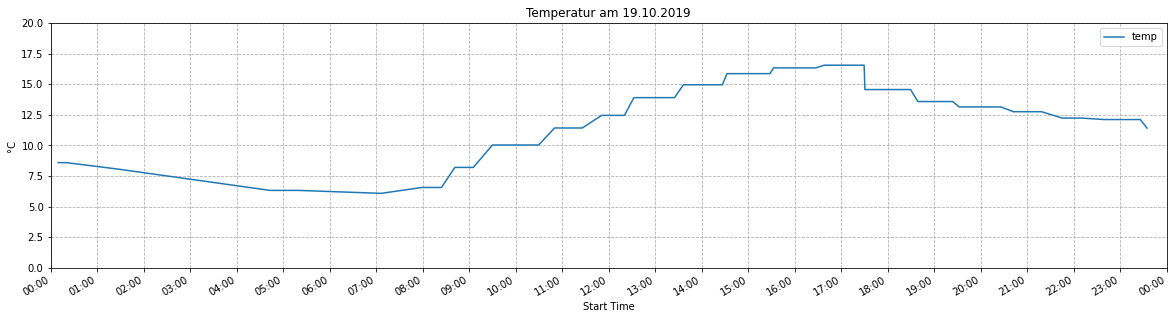

In [65]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot()
_ = df_oct2019[['Start Time', 'temp']].set_index('Start Time')['2019-10-19'].plot(ax=ax, y='temp')

ax.set_xlabel('Start Time')
ax.set_ylabel('°C')
ax.set_title('Temperatur am 19.10.2019')

ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')
             
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax.set_ylim(0, 20)
ax.set_xlim([datetime(2019, 10, 19, 0, 0, 0, tzinfo=tz.gettz('US/Eastern')), datetime(2019, 10, 20, 0, 0, 0, tzinfo=tz.gettz('US/Eastern'))])

#plt.tight_layout()
plt.show()

Die Tiefsttemperatur von 6.1°C wurde um 7 Uhr erreicht. Danach wurde es wieder etwas wärmer.

### rain_1h

Untersuchungen zum Niederschlag.

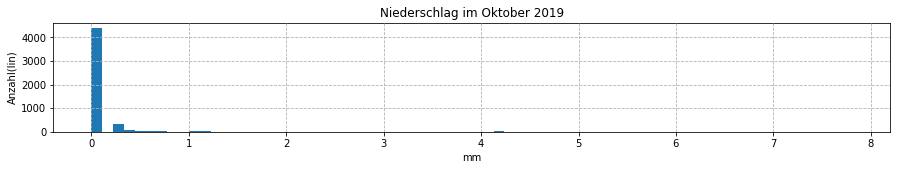

Info Histogram: [ Klassen: 70, Breite: 0.11157, Skew: 9.92870, Kurt: 120.06672 ]


In [66]:
_ = show_hist(df_oct2019['rain_1h'], 'mm', 'Anzahl', 'Niederschlag im Oktober 2019')

Im Histogramm ist nur ersichtlich das die Werte sich in der Nähe von 0 häufen, daher noch ein Histogramm mit logarithmischer y-Achse.

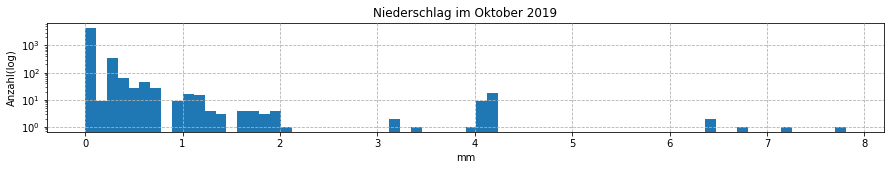

Info Histogram: [ Klassen: 70, Breite: 0.11157, Skew: 9.92870, Kurt: 120.06672 ]


In [67]:
_ = show_hist(df_oct2019['rain_1h'], 'mm', 'Anzahl', 'Niederschlag im Oktober 2019', log=True)

Hier lässt sich herauslesen, dass es meistens bis zu 2mm Niederschlag gab und manchmal auch mehr. Aber an welchen Tagen es im Oktober 2019 geregnet hat, lässt sich nicht erkennen.

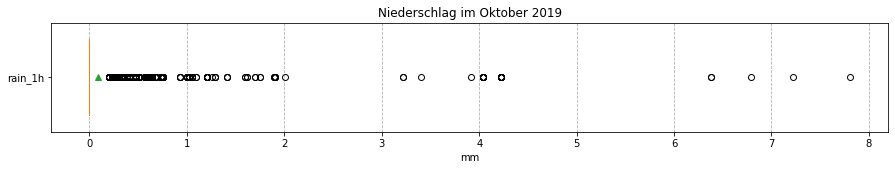

In [68]:
_ = show_box(df_oct2019['rain_1h'], 'mm', 'Niederschlag im Oktober 2019', labels=['rain_1h'])

Der Boxplot zeigt das gleiche Bild wie das Histogramm, d.h. der Median liegt bei 0mm, der Durchschnitt etwas über 0mm und alle anderen Werte werden als Ausreisser markiert.

Die Übersicht in Zahlen zum Merkmal rain_1h:

In [69]:
df_oct2019['rain_1h'].describe()

count   5000.00000
mean       0.08230
std        0.42080
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        7.81000
Name: rain_1h, dtype: float64

* Im Monat Oktober 2019 hat es durchschnittlich 0.0823mm Niederschlag gegeben.
* Sehr viele Werte sind hier 0, dadurch sind die Quartile auch 0.
* Der Maximalwert ist 7.81mm.

Damit nun auch ersichtlich ist, an welchen Tagen es wie viel Niederschlag gab, wird ein Plot über den ganzen Monat erstellt.

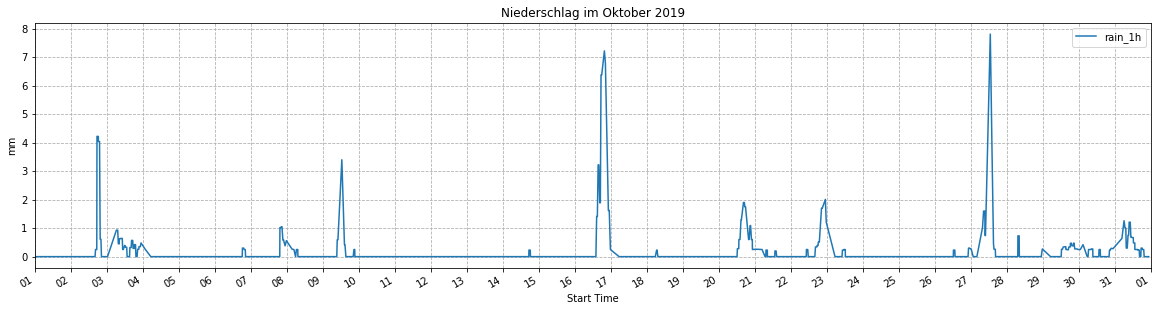

In [70]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot()
_ = df_oct2019.sort_values('Start Time')[['Start Time', 'rain_1h']].plot(ax=ax, x='Start Time', y='rain_1h')

ax.set_xlabel('Start Time')
ax.set_ylabel('mm')
ax.set_title('Niederschlag im Oktober 2019')

ax.yaxis.grid(linestyle='dashed')
ax.xaxis.grid(linestyle='dashed')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))

ax.set_xlim([datetime(2019, 10, 1, 0, 0, 0, tzinfo=tz.gettz('US/Eastern')), datetime(2019, 11, 1, 0, 0, 0, tzinfo=tz.gettz('US/Eastern'))])

#plt.tight_layout()
plt.show()

Am meisten Niederschlag von 7.81mm gab es am 27. Oktober ca. gegen Mittag. Und am 17. Oktober hat es auch etwas über 7mm Niederschlag gegen Abend gegeben.

In [71]:
##### NEXT ANALYSIS ###

# Analyse ```summary-daily-subscribers_only-citibike-tripweather.parquet```

## Merkmale

In [72]:
df_sumsubs = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-citibike-tripweather.parquet'))

In [73]:
df_sumsubs.tail().T

Date                    2020-04-26  2020-04-27  2020-04-28  2020-04-29  \
Trip count              7658.00000 14942.00000 28808.00000 17793.00000   
Trip Duration mean       909.11413   909.51151  1162.71529   944.66768   
Trip Duration std        872.16502   867.31142  1077.94083   873.58187   
Trip Duration min         61.00000    61.00000    61.00000    61.00000   
Trip Duration median     639.50000   659.00000   894.00000   690.00000   
Trip Duration max      17985.00000 21000.00000 20394.00000 16614.00000   
Linear Distance mean       1.77203     1.85279     2.09608     1.92779   
Linear Distance std        1.69919     1.69954     1.84255     1.78455   
Linear Distance min        0.00000     0.00000     0.00000     0.00000   
Linear Distance median     1.24292     1.34243     1.58105     1.39203   
Linear Distance max       15.28464    13.50936    14.51794    14.12451   
Age 2020 count          7658.00000 14942.00000 28808.00000 17793.00000   
Age 2020 mean             39.81431    40.77379    39.99729    40.47935   
Age 2020 std              11.95044    12.24587    12.11880    12.16765   
Age 2020 min              17.00000    16.00000    16.00000    16.00000   
Age 2020 median           37.00000    38.00000    37.00000    38.00000   
Age 2020 max              80.00000    80.00000    81.00000    81.00000   
temp mean                  9.09741     6.84308    10.30875    10.79875   
temp std                   0.82874     1.61124     4.86921     1.75832   
temp median                9.16000     6.69000     7.74500    10.74500   
temp min                   7.91000     4.51000     4.98000     8.38000   
temp max                  11.37000     9.64000    18.25000    14.69000   
humidity mean             75.74074    77.42308    59.37500    74.04167   
humidity std              14.62241    10.83761    17.34512    10.46518   
humidity median           76.00000    81.00000    66.00000    76.00000   
humidity min              40.00000    57.00000    25.00000    50.00000   
humidity max              93.00000    93.00000    75.00000    87.00000   
wind_speed mean            5.79926     3.18462     3.21000     4.74708   
wind_speed std             2.47887     1.32082     1.68901     2.19028   
wind_speed median          5.68000     3.10000     2.60000     4.85000   
wind_speed min             2.10000     1.50000     1.50000     1.50000   
wind_speed max             9.80000     7.20000     7.15000     8.70000   
rain_1h sum                5.27000     1.95000     0.00000     0.29000   
rain_1h min                0.00000     0.00000     0.00000     0.00000   
rain_1h max                1.01000     0.35000     0.00000     0.29000   
snow_1h sum                0.00000     0.00000     0.00000     0.00000   
snow_1h min                0.00000     0.00000     0.00000     0.00000   
snow_1h max                0.00000     0.00000     0.00000     0.00000   

Date                    2020-04-30  
Trip count             12297.00000  
Trip Duration mean       899.94633  
Trip Duration std        879.19177  
Trip Duration min         61.00000  
Trip Duration median     640.00000  
Trip Duration max      19953.00000  
Linear Distance mean       1.77484  
Linear Distance std        1.67552  
Linear Distance min        0.00000  
Linear Distance median     1.27195  
Linear Distance max       16.66022  
Age 2020 count         12297.00000  
Age 2020 mean             40.64471  
Age 2020 std              12.09568  
Age 2020 min              17.00000  
Age 2020 median           38.00000  
Age 2020 max              81.00000  
temp mean                 11.83769  
temp std                   1.89143  
temp median               10.82500  
temp min                  10.02000  
temp max                  15.11000  
humidity mean             84.80769  
humidity std               6.98008  
humidity median           87.00000  
humidity min              71.00000  
humidity max              93.00000  
wind_speed mean            6.13077  
wind_speed std             1.59819  
win

| Statistische Einheit | Merkmal                    | Skalenniveau    | Kontinuität | Beschreibung
| ---------------------| ---------------------------| --------------- | ----------- | -------------
| Day                  | **Date**                   | **Intervall**   | diskret     | Datum
| Trip                 | **Trip count**             | **Verhältnis**  | diskret     | Gesamte Anzahl Trips an diesem Tag
| Trip                 | **Trip Duration mean**     | **Verhältnis**  | stetig      | Durchschnittliche Dauer
| Trip                 | **Trip Duration std**      | **Verhältnis**  | stetig      | Standardabweichung der Dauer
| Trip                 | **Trip Duration min**      | **Verhältnis**  | stetig      | Dauer des schnellsten Trips
| Trip                 | **Trip Duration median**   | **Verhältnis**  | stetig      | Median der Dauer
| Trip                 | **Trip Duration max**      | **Verhältnis**  | stetig      | Dauer des längsten Trips
| Trip                 | **Linear Distance mean**   | **Verhältnis**  | stetig      | Durchschnittliche Distanz (Luftlinie zwischen Stationen)
| Trip                 | **Linear Distance std**    | **Verhältnis**  | stetig      | Standardabweichung der Distanz
| Trip                 | **Linear Distance min**    | **Verhältnis**  | stetig      | Distanz des kürzesten Trips
| Trip                 | **Linear Distance median** | **Verhältnis**  | stetig      | Median der Distanz 
| Trip                 | **Linear Distance max**    | **Verhältnis**  | stetig      | Distanz des weitesten Trips
| User                 | **Age 2020 count**         | **Verhältnis**  | diskret     | Gesamte Anzahl angegebener Alter
| User                 | **Age 2020 mean**          | **Verhältnis**  | stetig      | Durchschnittliches Alter
| User                 | **Age 2020 std**           | **Verhältnis**  | diskret     | Standardabweichung des Alters
| User                 | **Age 2020 min**           | **Verhältnis**  | diskret     | Jüngstes Alter
| User                 | **Age 2020 median**        | **Verhältnis**  | stetig      | Median des Alters
| User                 | **Age 2020 max**           | **Verhältnis**  | diskret     | Ältestes Alter
| Temperature          | **temp mean**              | **Intervall**   | stetig      | Durchschnittliche Temperatur (°C)
| Temperature          | **temp std**               | **Intervall**   | stetig      | Standardabweichung der Temperatur (°C)
| Temperature          | **temp median**            | **Intervall**   | stetig      | Median der Temperatur (°C)
| Temperature          | **temp min**               | **Intervall**   | stetig      | Tiefste Temperatur (°C)
| Temperature          | **temp max**               | **Intervall**   | stetig      | Höchste Temperatur (°C)
| Wind                 | **wind_speed mean**        | **Verhältnis**  | stetig      | Durchschnittliche Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed std**         | **Verhältnis**  | stetig      | Standardabweichung der Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed median**      | **Verhältnis**  | stetig      | Median der Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed min**         | **Verhältnis**  | stetig      | Tiefste Windgeschwindigkeit (m/s)
| Wind                 | **wind_speed max**         | **Verhältnis**  | stetig      | Höchste Windgeschwindigkeit (m/s)
| Rainfall             | **rain_1h sum**            | **Verhältnis**  | stetig      | Gesamte Menge an Niederschlag (mm)
| Rainfall             | **rain_1h min**            | **Verhältnis**  | stetig      | Tiefste Menge an Niederschlag in 1h am Tag (mm)
| Rainfall             | **rain_1h max**            | **Verhältnis**  | stetig      | Höchste Menge an Niederschlag in 1h am Tag (mm)
| Snowfall             | **snow_1h sum**            | **Verhältnis**  | stetig      | Gesamte Menge an Schneefall (mm)
| Snowfall             | **snow_1h min**            | **Verhältnis**  | stetig      | Tiefste Menge an Schneefall in 1h am Tag (mm)
| Snowfall             | **snow_1h max**            | **Verhältnis**  | stetig      | Höchste Menge an Schneefall in 1h am Tag (mm)

# Analyse ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```

## Merkmale

In [74]:
df_sumsubs_bygen = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet'))

In [75]:
df_sumsubs_bygen.tail().T

Date                    2020-04-29  2020-04-29 2020-04-30  2020-04-30  \
Gender                           1           2          0           1   
Trip count             12383.00000  5180.00000  181.00000  8895.00000   
Trip Duration mean       911.63708  1023.60927  968.38674   870.98954   
Trip Duration std        869.96530   877.27523  968.50382   887.19920   
Trip Duration min         61.00000    62.00000  108.00000    61.00000   
Trip Duration median     654.00000   789.50000  549.00000   609.00000   
Trip Duration max      16614.00000 16300.00000 6190.00000 19953.00000   
Linear Distance mean       1.89932     1.99754    1.81687     1.72799   
Linear Distance std        1.78566     1.77725    1.92322     1.65931   
Linear Distance min        0.00000     0.00000    0.00000     0.00000   
Linear Distance median     1.35603     1.47473    1.08924     1.22591   
Linear Distance max       14.12451    12.30219    8.51553    16.66022   
Age 2020 count         12383.00000  5180.00000  181.00000  8895.00000   
Age 2020 mean             40.72963    39.72220   44.00000    41.02530   
Age 2020 std              12.23206    12.04447    9.85788    12.20961   
Age 2020 min              16.00000    16.00000   24.00000    17.00000   
Age 2020 median           38.00000    36.00000   51.00000    39.00000   
Age 2020 max              80.00000    79.00000   70.00000    81.00000   
temp mean                 10.79875    10.79875   11.83769    11.83769   
temp std                   1.75832     1.75832    1.89143     1.89143   
temp median               10.74500    10.74500   10.82500    10.82500   
temp min                   8.38000     8.38000   10.02000    10.02000   
temp max                  14.69000    14.69000   15.11000    15.11000   
humidity mean             74.04167    74.04167   84.80769    84.80769   
humidity std              10.46518    10.46518    6.98008     6.98008   
humidity median           76.00000    76.00000   87.00000    87.00000   
humidity min                    50          50         71          71   
humidity max                    87          87         93          93   
wind_speed mean            4.74708     4.74708    6.13077     6.13077   
wind_speed std             2.19028     2.19028    1.59819     1.59819   
wind_speed median          4.85000     4.85000    6.20000     6.20000   
wind_speed min             1.50000     1.50000    3.10000     3.10000   
wind_speed max             8.70000     8.70000    8.70000     8.70000   
rain_1h sum                0.29000     0.29000   10.32000    10.32000   
rain_1h min                0.00000     0.00000    0.00000     0.00000   
rain_1h max                0.29000     0.29000    1.27000     1.27000   
snow_1h sum                0.00000     0.00000    0.00000     0.00000   
snow_1h min                0.00000     0.00000    0.00000     0.00000   
snow_1h max                0.00000     0.00000    0.00000     0.00000   

Date                    2020-04-30  
Gender                           2  
Trip count              3221.00000  
Trip Duration mean       976.06644  
Trip Duration std        846.63441  
Trip Duration min         61.00000  
Trip Duration median     739.00000  
Trip Duration max      13597.00000  
Linear Distance mean       1.90184  
Linear Distance std        1.69891  
Linear Distance min        0.00000  
Linear Distance median     1.40006  
Linear Distance max       11.43502  
Age 2020 count          3221.00000  
Age 2020 mean             39.40515  
Age 2020 std              11.78659  
Age 2020 min              17.00000  
Age 2020 median           36.00000  
Age 2020 max              77.00000  
temp mean                 11.83769  
temp std                   1.89143  
temp median               10.82500  
temp min                  10.02000  
temp max                  15.11000  
humidity mean             84.80769  
humidity std               6.98008  
humidity median           87.00000  
humidity min                    71  
humidity max                    93  
wind_s

Zusätzlich zu den Merkmalen aus ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```, gibt es noch zusätzlich das folgende Merkmal:

| Statistische Einheit | Merkmal                    | Skalenniveau   | Beschreibung
| ---------------------| ---------------------------| ---------------| -------------
| User                 | **Gender**                 | **Nominal**    | Geschlecht des Benutzers: ```0```=_unknown_; ```1```=_male_; ```2```=_female_ 

# Anhang

In [76]:
def numcols_hist(df):
    '''
    Plots all histograms of numeric columns in the DataFrame.
    '''    
    numeric_columns = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            numeric_columns.append(col)
    
    fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
    gs = gridspec.GridSpec(len(numeric_columns), 2, figure=fig)

    for idx, col in enumerate(numeric_columns):
        ax = fig.add_subplot(gs[idx, 0])
        ax.set_title(col)
        _ = df[col].hist(ax=ax, bins=25)

        ax = fig.add_subplot(gs[idx, 1])
        ax.set_title(col + ' (log)')
        _ = df[col].hist(ax=ax, bins=25)
        ax.set_yscale('log')

    fig.tight_layout()
    plt.show()

In [77]:
def numcols_box(df):
    '''
    Plots all boxplots of numeric columns in the DataFrame.
    '''    
    numeric_columns = []
    for col in df.columns:
        if df[col].dtype == np.float64 or df[col].dtype == np.int64 or isinstance(df[col].dtype, pd.Int64Dtype):
            numeric_columns.append(col)
    
    fig = plt.figure(figsize=(20, len(numeric_columns) * 2))
    gs = gridspec.GridSpec(len(numeric_columns), 1, figure=fig)

    for idx, col in enumerate(numeric_columns):
        ax = fig.add_subplot(gs[idx, 0])
        ax.set_title(col)
        _ = ax.boxplot(df[col], vert=False, showmeans=True, widths=0.7)

    fig.tight_layout()
    plt.show()

## ```samples_5000_201910-citibike-tripweather-data.parquet```

In [78]:
df_oct2019 = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

### Übersicht

In [95]:
df_oct2019.describe(include='all').T

count unique                        top  freq  \
dt_utc                        5000   4995  2019-10-28 22:47:13+00:00     2   
Trip Duration           5000.00000    NaN                        NaN   NaN   
Start Time                    5000   4995  2019-10-28 18:47:13-04:00     2   
Stop Time                     5000   4989  2019-10-11 09:09:09-04:00     2   
Start Station ID        5000.00000    NaN                        NaN   NaN   
Start Station Name            5000    715      Pershing Square North    34   
Start Station Latitude  5000.00000    NaN                        NaN   NaN   
Start Station Longitude 5000.00000    NaN                        NaN   NaN   
End Station ID          5000.00000    NaN                        NaN   NaN   
End Station Name              5000    714      Pershing Square North    50   
End Station Latitude    5000.00000    NaN                        NaN   NaN   
End Station Longitude   5000.00000    NaN                        NaN   NaN   
Bike ID                 5000.00000    NaN                        NaN   NaN   
User Type                     5000      2                 Subscriber  4288   
Birth Year              5000.00000    NaN                        NaN   NaN   
Gender                        5000      3                          1  3359   
Linear Distance         5000.00000    NaN                        NaN   NaN   
Age 2020                5000.00000    NaN                        NaN   NaN   
temp                    5000.00000    NaN                        NaN   NaN   
pressure                5000.00000    NaN                        NaN   NaN   
humidity                5000.00000    NaN                        NaN   NaN   
wind_speed              5000.00000    NaN                        NaN   NaN   
rain_1h                 5000.00000    NaN                        NaN   NaN   
snow_1h                 5000.00000    NaN                        NaN   NaN   
clouds_all              5000.00000    NaN                        NaN   NaN   
weather_id              5000.00000    NaN                        NaN   NaN   
weather_main                  5000      3                      Clear  2744   
weather_description           5000      8               sky is clear  2744   

                                             first                       last  \
dt_utc                   2019-10-01 04:48:07+00:00  2019-11-01 02:46:46+00:00   
Trip Duration                                  NaN                        NaN   
Start Time               2019-10-01 00:48:07-04:00  2019-10-31 22:46:46-04:00   
Stop Time                2019-10-01 01:01:40-04:00  2019-10-31 22:54:45-04:00   
Start Station ID                               NaN                        NaN   
Start Station Name                             NaN                        NaN   
Start Station Latitude                         NaN                        NaN   
Start Station Longitude                        NaN                        NaN   
End Station ID                                 NaN                        NaN   
End Station Name                               NaN                        NaN   
End Station Latitude                           NaN                        NaN   
End Station Longitude                          NaN                        NaN   
Bike ID                                        NaN                        NaN   
User Type                                      NaN                        NaN   
Birth Year                                     NaN                        NaN   
Gender                                         NaN                        NaN   
Linear Distance                                NaN                        NaN   
Age 2020                                       NaN                        NaN   
temp                                           NaN                        NaN   
pressure                                       NaN                        NaN   
humidity                                       NaN               

### Histogramme für alle numerischen Merkmale

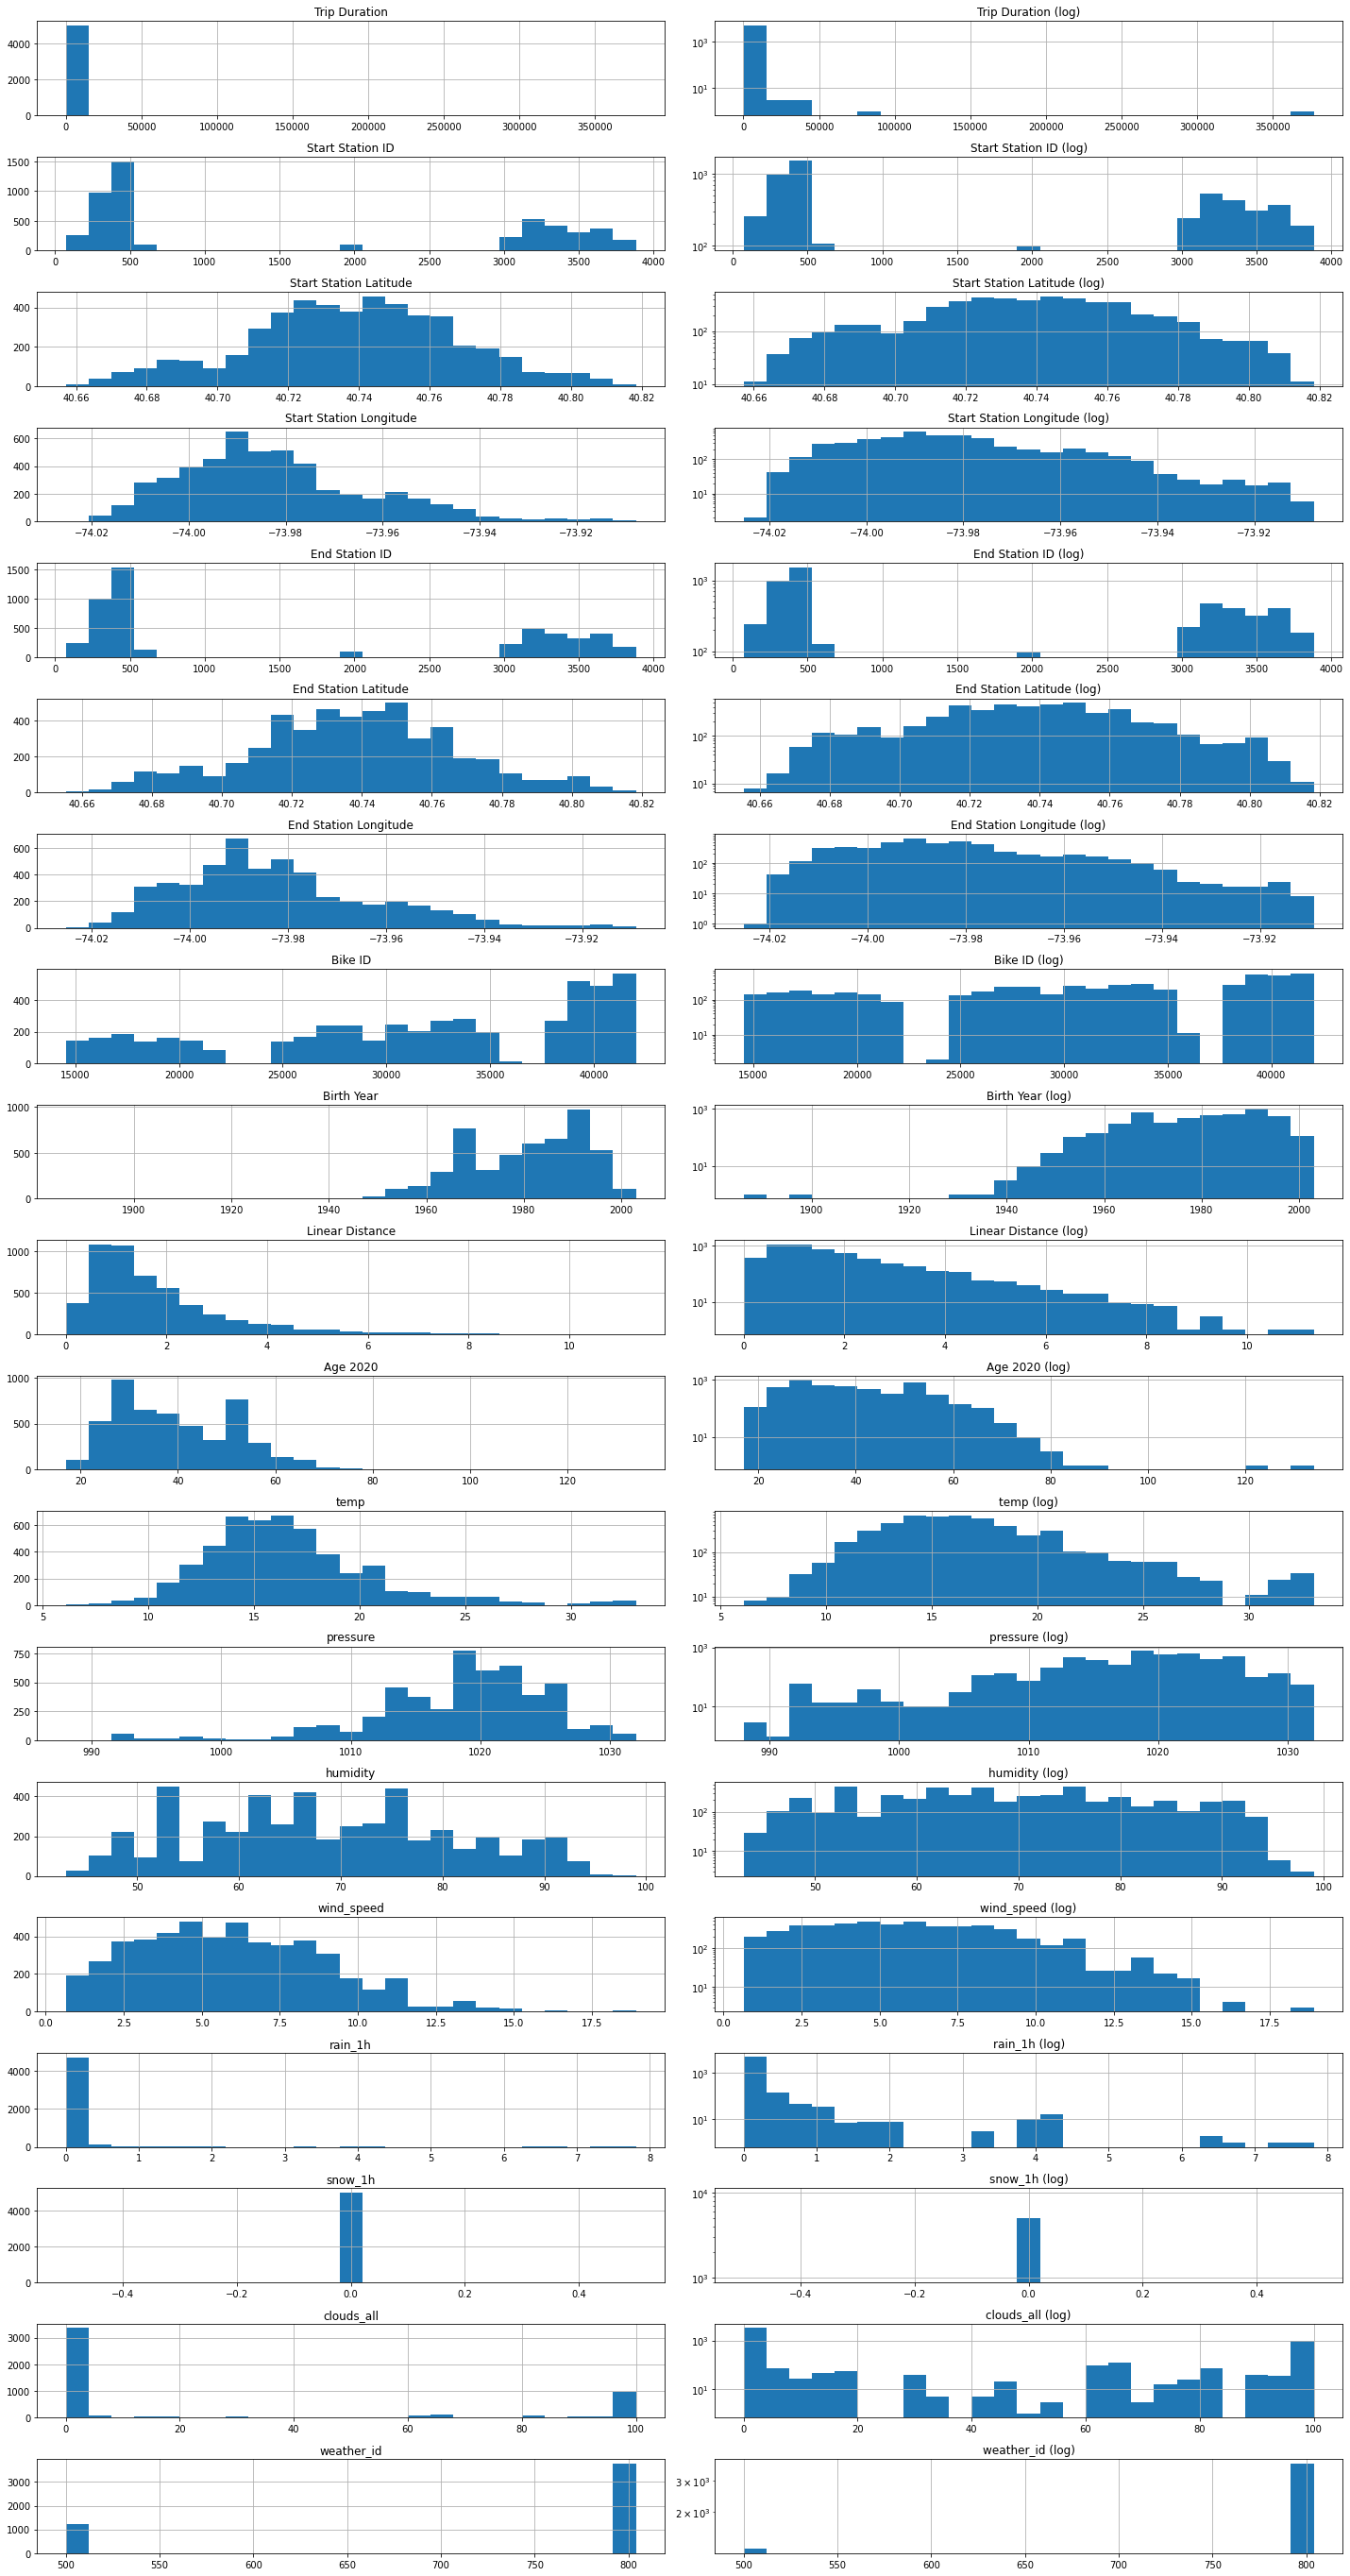

CPU times: user 4.51 s, sys: 138 ms, total: 4.65 s
Wall time: 4.5 s


In [79]:
%%time
numcols_hist(df_oct2019)

### Boxplots für alle numerischen Merkmale

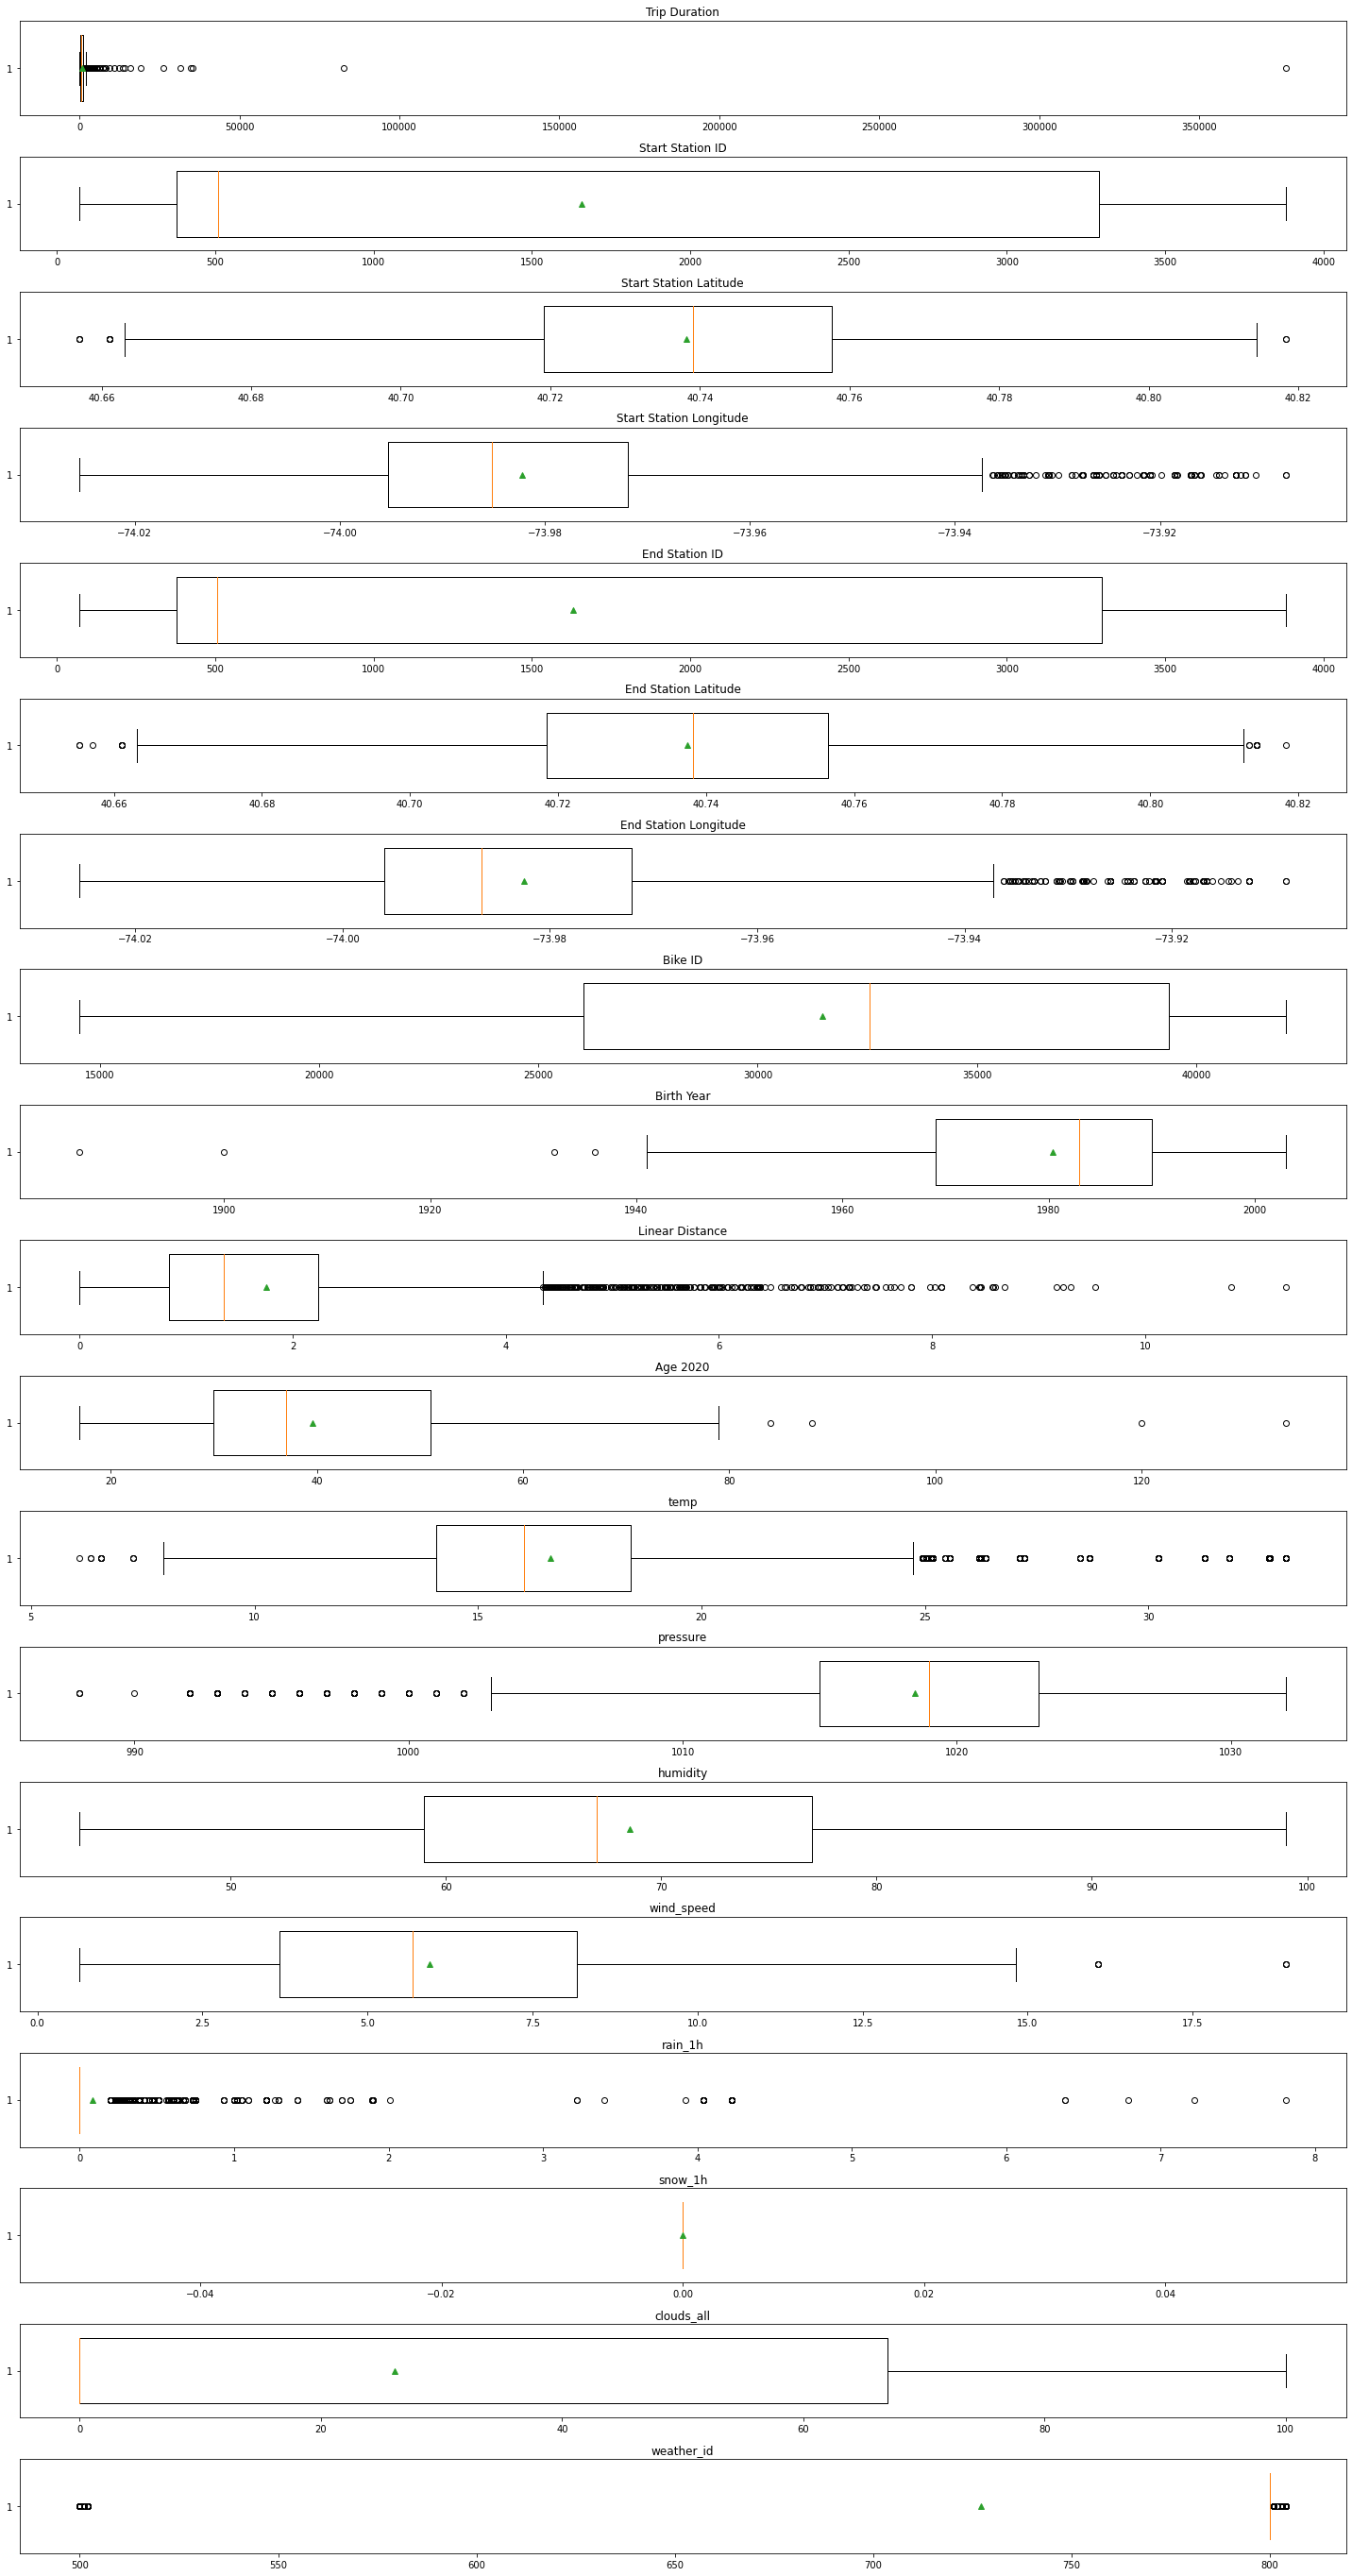

CPU times: user 1.38 s, sys: 139 ms, total: 1.52 s
Wall time: 1.36 s


In [80]:
%%time
numcols_box(df_oct2019)

## ```summary-daily-subscribers_only-citibike-tripweather.parquet```

In [81]:
df_sumsubs = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-citibike-tripweather.parquet'))

### Übersicht

In [94]:
df_sumsubs.describe(include='all').T

count        mean         std        min  \
Trip count             2488.00000 33624.25442 17238.81747  854.00000   
Trip Duration mean     2488.00000   730.18025    84.82187  528.94266   
Trip Duration std      2488.00000   644.92487   100.00514  425.17287   
Trip Duration min      2488.00000    60.77492     0.60952   60.00000   
Trip Duration median   2488.00000   564.98734    63.83065  384.00000   
Trip Duration max      2488.00000 19473.83079  2152.79880 4386.00000   
Linear Distance mean   2488.00000     1.69977     0.15094    1.18932   
Linear Distance std    2488.00000     1.29998     0.15181    0.81756   
Linear Distance min    2488.00000     0.00000     0.00000    0.00000   
Linear Distance median 2488.00000     1.32993     0.10533    0.94019   
Linear Distance max    2488.00000    11.30068     1.99914    6.19236   
Age 2020 count         2488.00000 33624.25442 17238.81747  854.00000   
Age 2020 mean          2488.00000    42.01439     1.89851   37.63548   
Age 2020 std           2488.00000    11.57191     0.42395   10.11158   
Age 2020 min           2488.00000    19.77854     1.96746   16.00000   
Age 2020 median        2488.00000    39.47749     2.31447   34.00000   
Age 2020 max           2488.00000    80.88384     0.36725   76.00000   
temp mean              2488.00000    13.11709     9.67349  -13.26792   
temp std               2488.00000     2.47641     1.04339    0.23220   
temp median            2488.00000    12.61138     9.72265  -14.05000   
temp min               2488.00000     9.83856     9.45862  -17.28000   
temp max               2488.00000    17.21666     9.94479   -9.47000   
humidity mean          2488.00000    62.95264    14.79839   21.54167   
humidity std           2488.00000    10.56184     4.78186    1.01419   
humidity median        2488.00000    64.51407    16.28417   20.50000   
humidity min           2488.00000    45.29542    15.48926    8.00000   
humidity max           2488.00000    78.21704    14.31669   31.00000   
wind_speed mean        2488.00000     3.19217     1.33719    1.21583   
wind_speed std         2488.00000     1.12257     0.50754    0.23324   
wind_speed median      2488.00000     3.07145     1.36614    1.06000   
wind_speed min         2488.00000     1.47889     0.92916    0.01000   
wind_speed max         2488.00000     5.54780     2.12569    1.75000   
rain_1h sum            2488.00000     4.28425     9.60217    0.00000   
rain_1h min            2488.00000     0.00071     0.01281    0.00000   
rain_1h max            2488.00000     1.10980     2.38371    0.00000   
snow_1h sum            2488.00000     0.94801    17.89780    0.00000   
snow_1h min            2488.00000     0.00000     0.00000    0.00000   
snow_1h max            2488.00000     0.17759     2.40980    0.00000   

                               25%         50%         75%         max  
Trip count             20760.00000 31608.00000 45691.25000 82687.00000  
Trip Duration mean       666.54312   730.45161   776.26491  1362.62602  
Trip Duration std        579.20245   626.70581   693.31063  1295.39725  
Trip Duration min         60.00000    61.00000    61.00000    68.00000  
Trip Duration median     515.00000   569.00000   604.00000  1146.00000  
Trip Duration max      18590.25000 20168.00000 21041.25000 21599.00000  
Linear Distance mean       1.59777     1.71382     1.81063     2.35995  
Linear Distance std        1.20612     1.29468     1.41221     1.92825  
Linear Distance min        0.00000     0.00000     0.00000     0.00000  
Linear Distance median     1.25917     1.34245     1.40088     1.89549  
Linear Distance max        9.60346    11.25219    12.72245    29.25823  
Age 2020 count         20760.00000 31608.00000 45691.25000 82687.00000  
Age 2020 mean             40.47882    41.97557    43.61358    46.63874  
Age 2020 std              11.32096    11.58466    11.85519    13.05243  
Age 2020 min              18.00000    20.00000    21.00000    23.00000  
Age 2020 median           38.00000    39.00000    4

### Histogramme für alle numerischen Merkmale

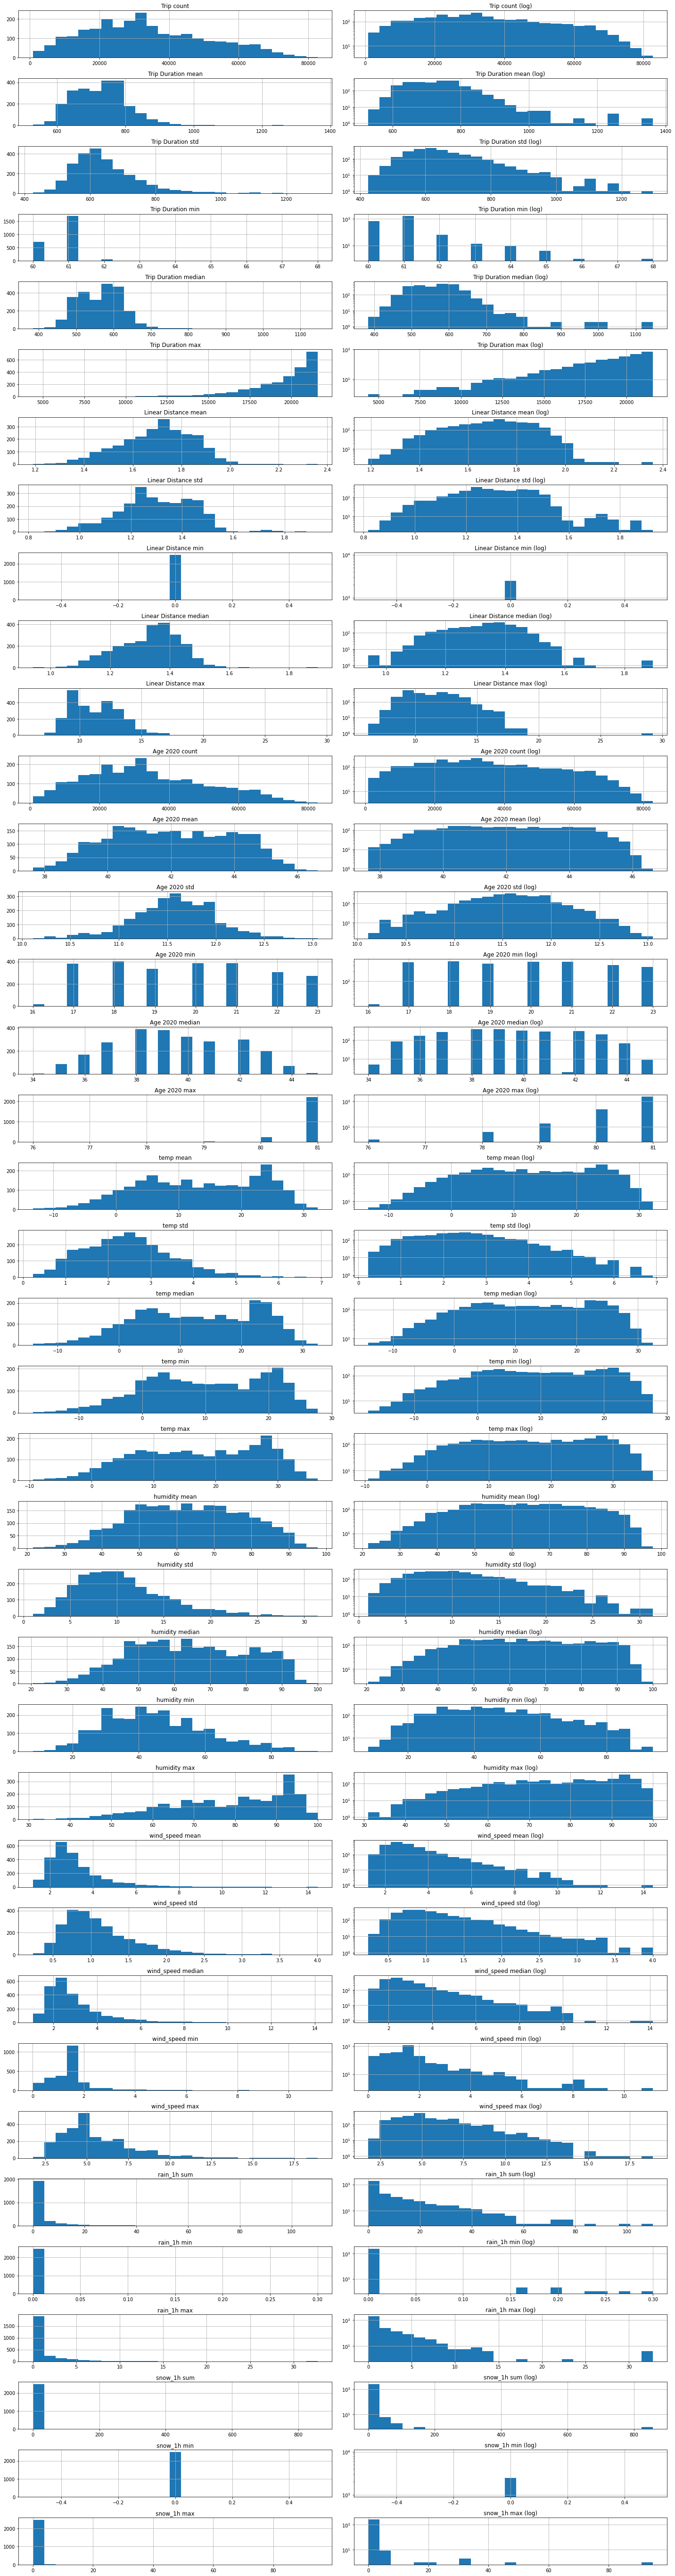

CPU times: user 9.11 s, sys: 185 ms, total: 9.29 s
Wall time: 9.14 s


In [82]:
%%time
numcols_hist(df_sumsubs)

### Boxplots für alle numerischen Merkmale

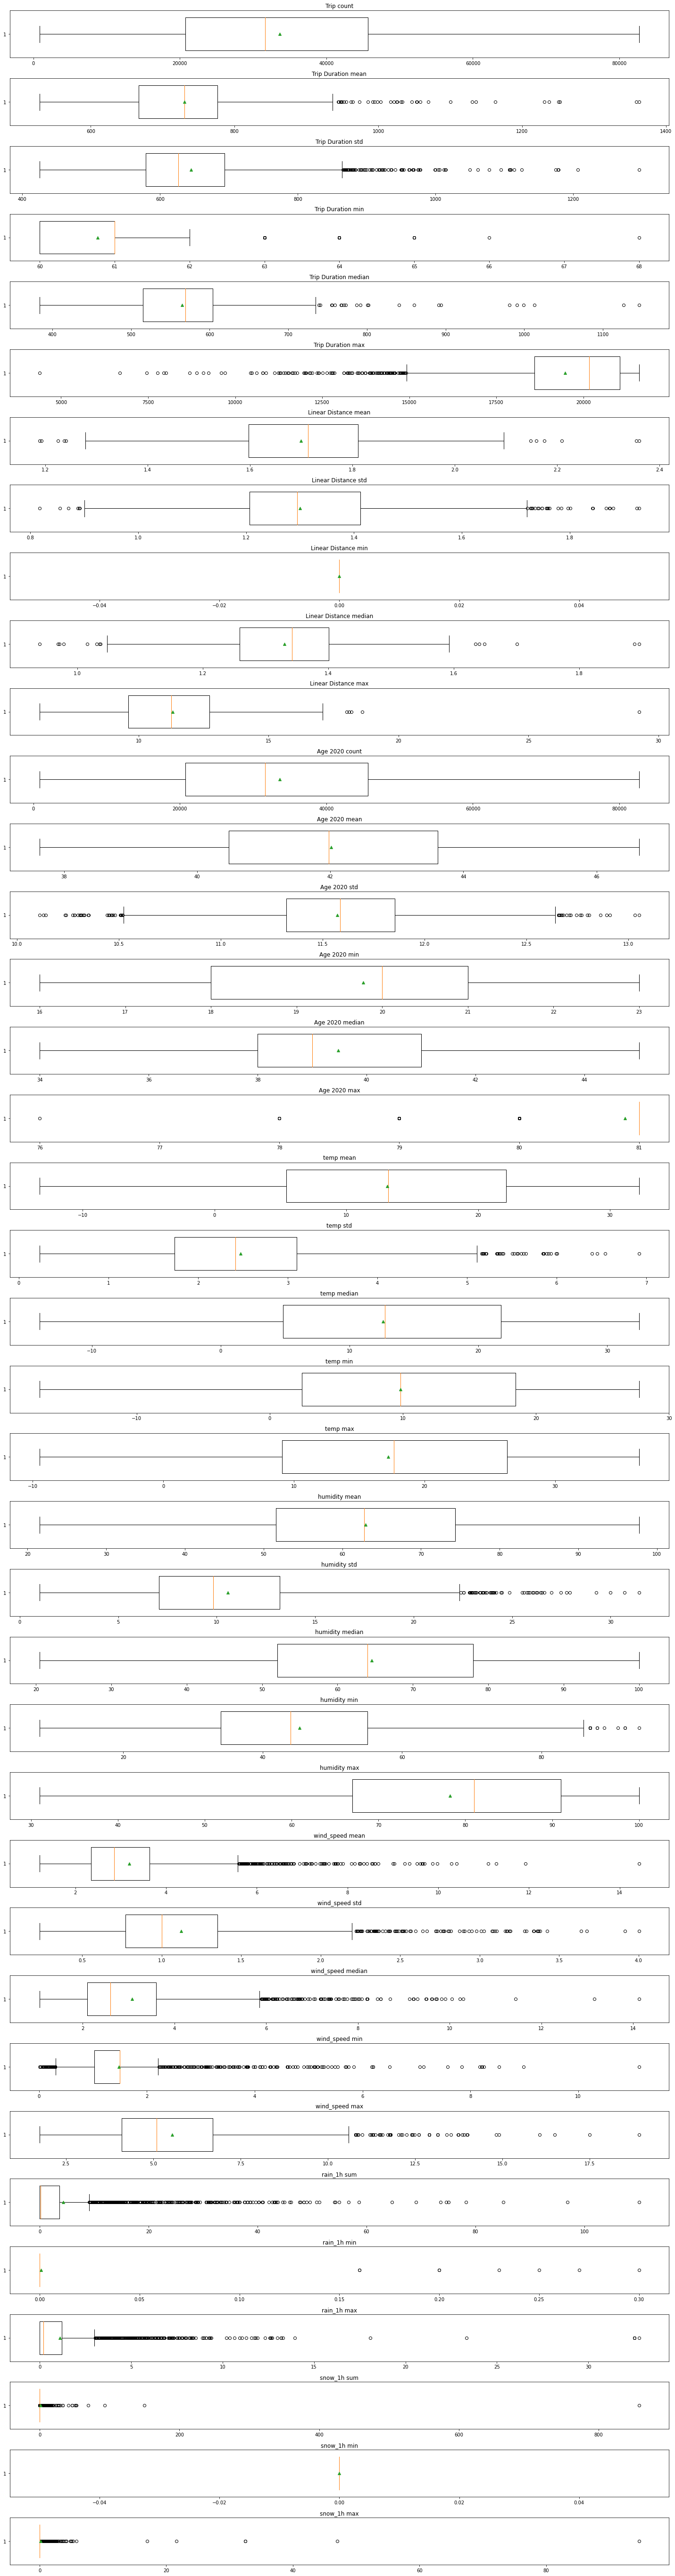

CPU times: user 2.85 s, sys: 147 ms, total: 3 s
Wall time: 2.84 s


In [83]:
%%time
numcols_box(df_sumsubs)

## ```summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet```

In [84]:
df_sumsubs_bygen = pd.read_parquet(os.path.join(path, 'summary-daily-subscribers_only-gender_grouped-citibike-tripweather.parquet'))

### Übersicht

In [93]:
df_sumsubs_bygen.describe(include='all').T

count unique  top  freq        mean         std  \
Gender                       7277      3    2  2488         NaN         NaN   
Trip count             7277.00000    NaN  NaN   NaN 11496.10348 12962.49726   
Trip Duration mean     7277.00000    NaN  NaN   NaN   757.97679   244.26912   
Trip Duration std      7277.00000    NaN  NaN   NaN   658.46979   283.66226   
Trip Duration min      7277.00000    NaN  NaN   NaN    91.73066   151.13083   
Trip Duration median   7277.00000    NaN  NaN   NaN   590.87928   267.98768   
Trip Duration max      7277.00000    NaN  NaN   NaN 13947.01731  6935.26159   
Linear Distance mean   7277.00000    NaN  NaN   NaN     1.68515     0.29682   
Linear Distance std    7277.00000    NaN  NaN   NaN     1.26070     0.29663   
Linear Distance min    7277.00000    NaN  NaN   NaN     0.06476     0.29353   
Linear Distance median 7277.00000    NaN  NaN   NaN     1.33087     0.27694   
Linear Distance max    7277.00000    NaN  NaN   NaN     9.41702     3.05602   
Age 2020 count         7277.00000    NaN  NaN   NaN 11496.10348 12962.49726   
Age 2020 mean          7277.00000    NaN  NaN   NaN    41.84666     5.20987   
Age 2020 std           7277.00000    NaN  NaN   NaN    10.48747     2.86389   
Age 2020 min           7277.00000    NaN  NaN   NaN    21.38615     6.15570   
Age 2020 median        7277.00000    NaN  NaN   NaN    40.35798     6.43786   
Age 2020 max           7277.00000    NaN  NaN   NaN    75.62416    11.92847   
temp mean              7277.00000    NaN  NaN   NaN    13.26330     9.59753   
temp std               7277.00000    NaN  NaN   NaN     2.47836     1.04115   
temp median            7277.00000    NaN  NaN   NaN    12.75754     9.64447   
temp min               7277.00000    NaN  NaN   NaN     9.98279     9.38138   
temp max               7277.00000    NaN  NaN   NaN    17.36718     9.87168   
humidity mean          7277.00000    NaN  NaN   NaN    63.06682    14.76252   
humidity std           7277.00000    NaN  NaN   NaN    10.56452     4.77441   
humidity median        7277.00000    NaN  NaN   NaN    64.64216    16.23476   
humidity min           7277.00000    NaN  NaN   NaN    45.39920    15.49780   
humidity max           7277.00000    NaN  NaN   NaN    78.33187    14.26562   
wind_speed mean        7277.00000    NaN  NaN   NaN     3.19492     1.34190   
wind_speed std         7277.00000    NaN  NaN   NaN     1.12299     0.50977   
wind_speed median      7277.00000    NaN  NaN   NaN     3.07417     1.37085   
wind_speed min         7277.00000    NaN  NaN   NaN     1.48131     0.93428   
wind_speed max         7277.00000    NaN  NaN   NaN     5.54928     2.13022   
rain_1h sum            7277.00000    NaN  NaN   NaN     4.26730     9.50955   
rain_1h min            7277.00000    NaN  NaN   NaN     0.00073     0.01297   
rain_1h max            7277.00000    NaN  NaN   NaN     1.11808     2.39440   
snow_1h sum            7277.00000    NaN  NaN   NaN     0.90369    18.04656   
snow_1h min            7277.00000    NaN  NaN   NaN     0.00000     0.00000   
snow_1h max            7277.00000    NaN  NaN   NaN     0.17301     2.42887   

                             min        25%         50%         75%  \
Gender                       NaN        NaN         NaN         NaN   
Trip count               1.00000  684.00000  7161.00000 17065.00000   
Trip Duration mean      85.00000  672.89272   740.46329   826.53929   
Trip Duration std        0.00000  557.47129   627.28950   724.25046   
Trip Duration min       60.00000   61.00000    61.00000    67.00000   
Trip Duration median    85.00000  518.00000   572.50000   639.00000   
Trip Duration max       85.00000 8076.00000 16674.00000 19802.00000   
Linear Distance mean     0.00000    1.57479     1.71173     1.82666   
Linear Distance std      0.00000    1.17874     1.29578     1.42450   
Linear Distance min      0.00000    0.00000     0.00000     0.00000   
Linear Distance median   0.00000    1.23672     1.33741     1.42586   
Linear Distance

### Histogramme für alle numerischen Merkmale

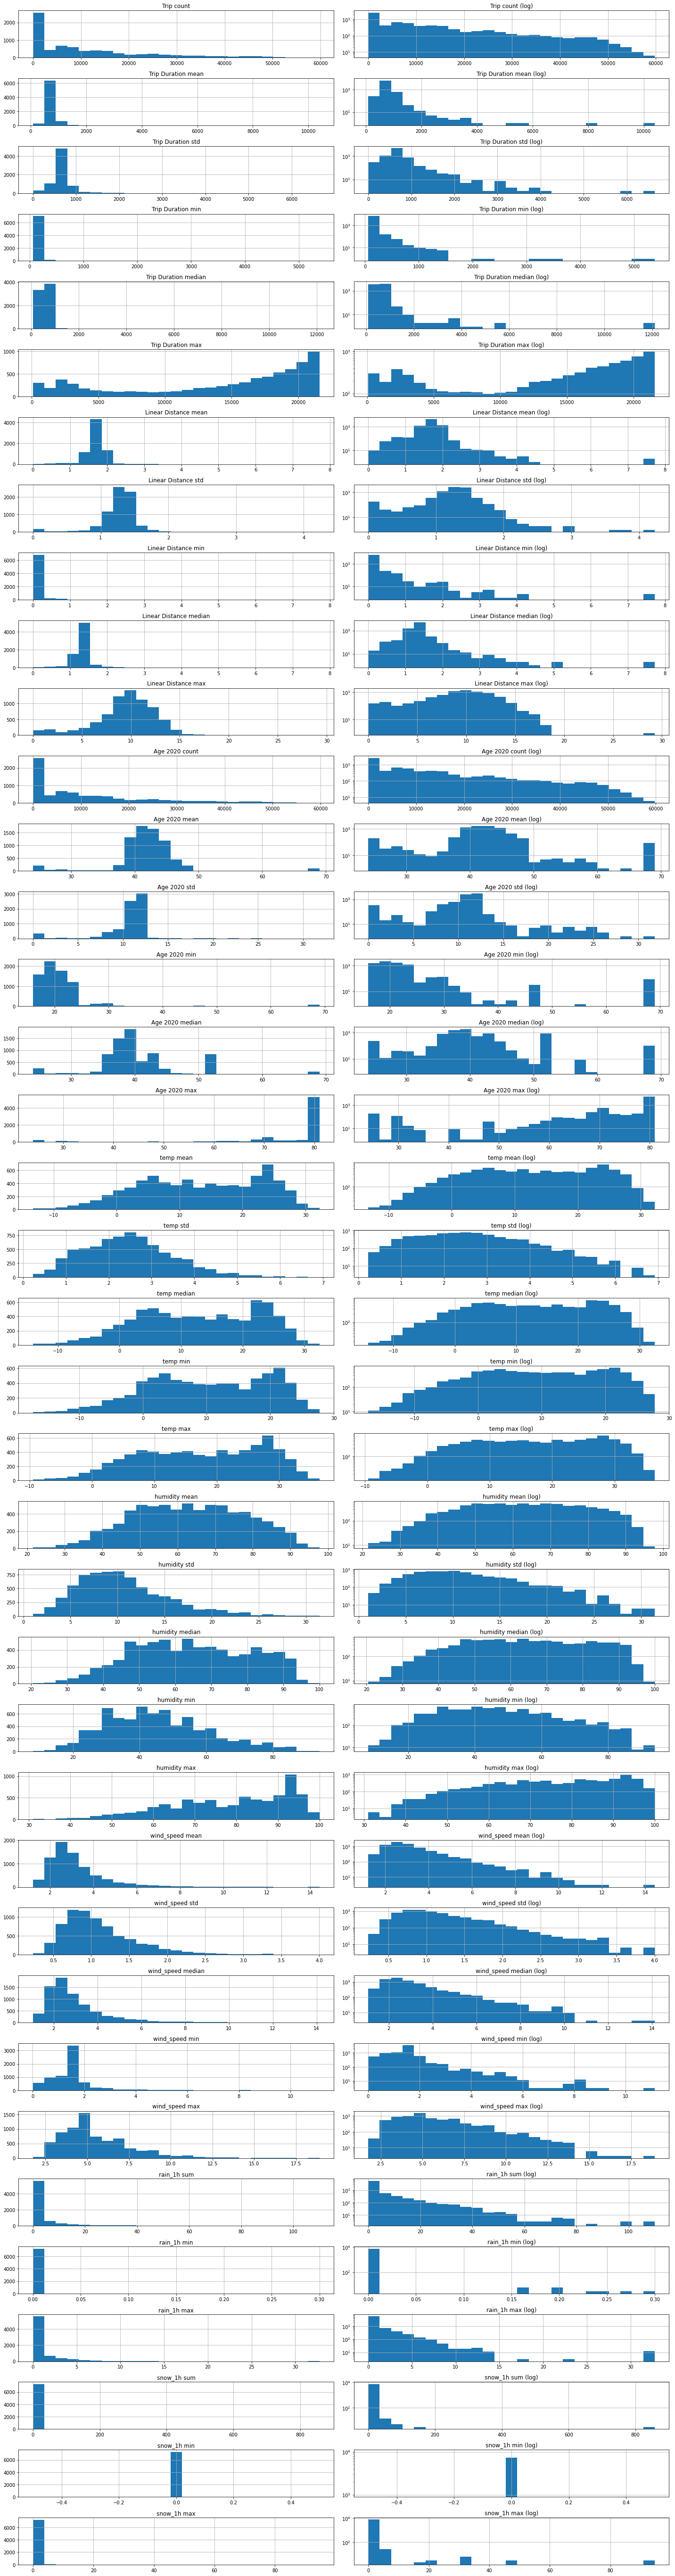

CPU times: user 8.97 s, sys: 161 ms, total: 9.13 s
Wall time: 8.97 s


In [85]:
%%time
numcols_hist(df_sumsubs_bygen)

### Boxplots für alle numerischen Merkmale

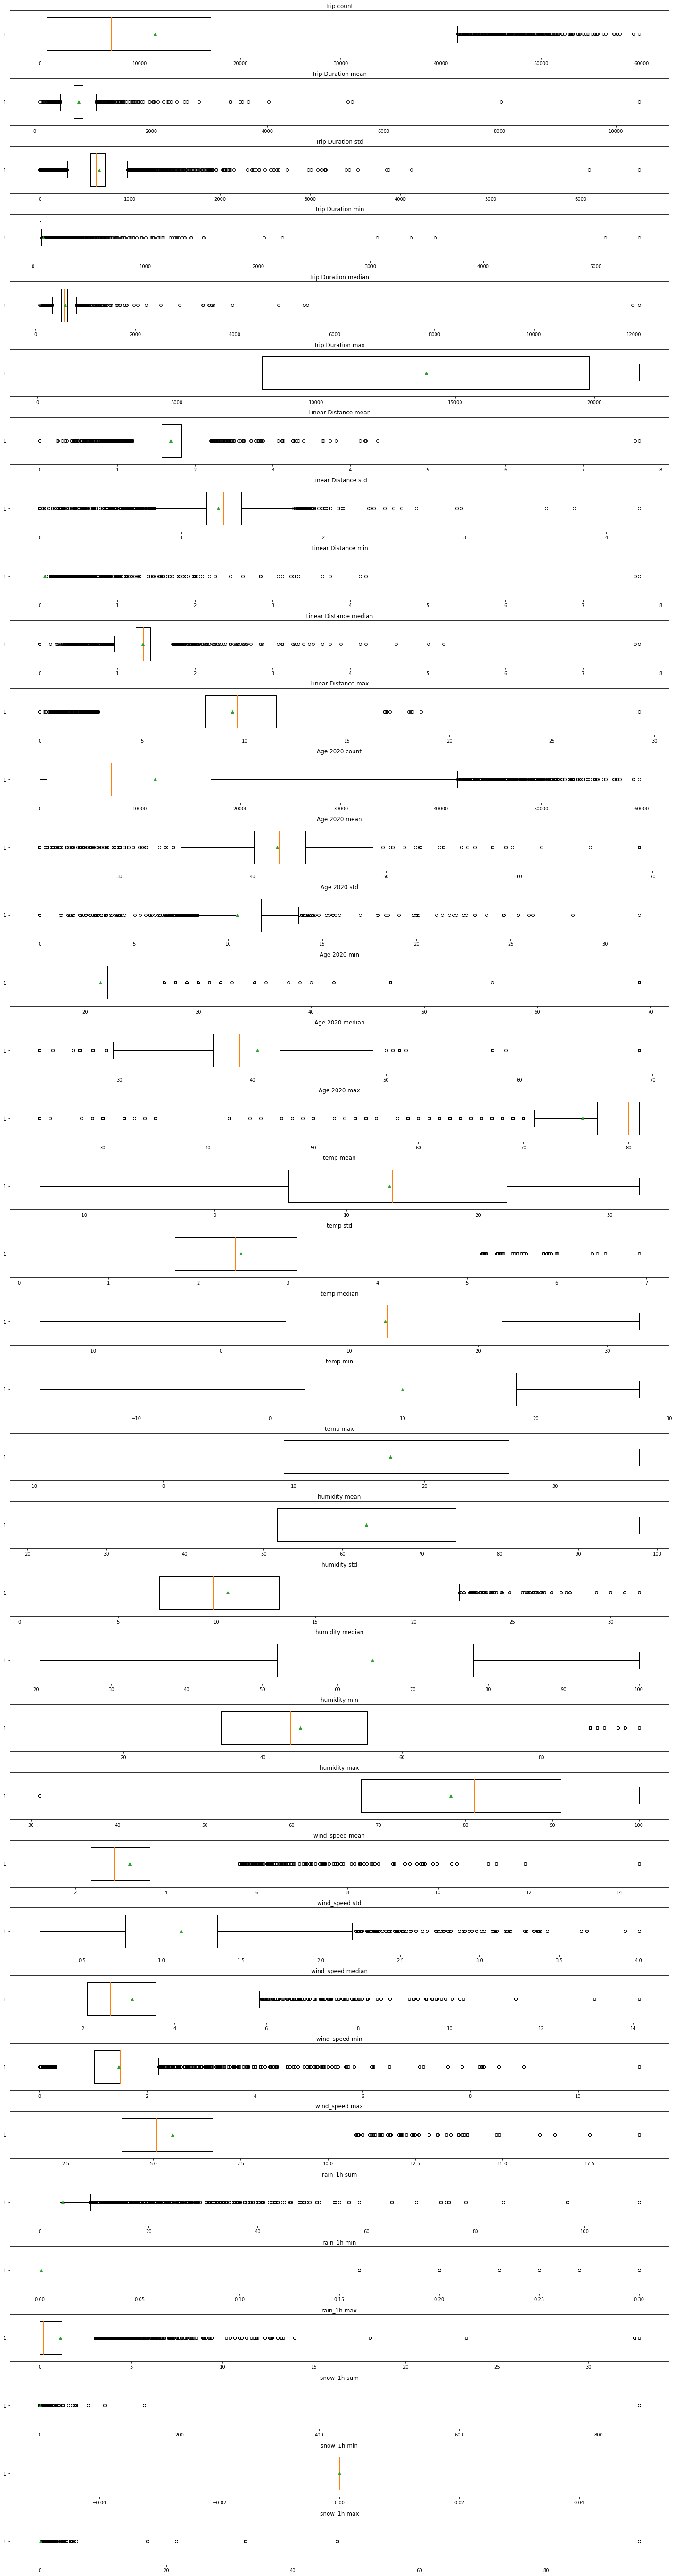

CPU times: user 2.8 s, sys: 116 ms, total: 2.92 s
Wall time: 2.76 s


In [86]:
%%time
numcols_box(df_sumsubs_bygen)